In [1]:
import numpy as np
import pandas as pd

In [2]:
import pickle  # For saving and loading trained models
import os
from os import path

# Importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder, LabelEncoder, 
                                   MinMaxScaler, OneHotEncoder)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler, PowerTransformer

# Importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
import pandas as pd

# Define the correct directory path
directory = r"C:\Users\naras\OneDrive\Documents\Desktop\Network Intrution detection system\CICIDS 2017 Dataset"

# Create an empty DataFrame to store the concatenated data
df = pd.DataFrame()

# Specify the keywords to identify the relevant files
keywords = [
    "Friday-WorkingHours-Afternoon-DDos",
    "Friday-WorkingHours-Afternoon-PortScan",
    "Friday-WorkingHours-Morning",  # Fixed missing closing quote
    "Monday-WorkingHours",
    "Thursday-WorkingHours-Afternoon-Infilteration",
    "Thursday-WorkingHours-Morning-WebAttacks",
    "Tuesday-WorkingHours",
    "Wednesday-workingHours",
]

# Iterate through the directory and filenames
for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        # Check if the filename contains any of the specified keywords
        if any(keyword in filename for keyword in keywords):
            # Construct the full path to the file
            file_path = os.path.join(dirname, filename)

            # Read CSV or Excel files
            if filename.endswith('.csv'):
                df_temp = pd.read_csv(file_path)
            elif filename.endswith(('.xls', '.xlsx')):
                df_temp = pd.read_excel(file_path)
            else:
                continue  # Skip files that are not CSV or Excel

            # Concatenate with the existing DataFrame
            df = pd.concat([df, df_temp], ignore_index=True)

            # Delete temporary DataFrame to save memory
            del df_temp

# Display the shape of the final concatenated DataFrame
nRow, nCol = df.shape
print(f'Rows: {nRow} Columns: {nCol}')


Rows: 2830743 Columns: 79


In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [6]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.0,53.0,80.0,443.0,65535.0
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-13.0,155.0,31316.0,3204828.5,119999998.0
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.0,2.0,2.0,5.0,219759.0
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.0,1.0,2.0,4.0,291922.0
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.0,12.0,62.0,187.0,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2830743.0,5.829582e+04,5.770923e+05,0.0,0.0,0.0,0.0,110000000.0
Idle Mean,2830743.0,8.316037e+06,2.363008e+07,0.0,0.0,0.0,0.0,120000000.0
Idle Std,2830743.0,5.038439e+05,4.602984e+06,0.0,0.0,0.0,0.0,76900000.0
Idle Max,2830743.0,8.695752e+06,2.436689e+07,0.0,0.0,0.0,0.0,120000000.0


In [8]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [9]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces from column names

# Now try accessing 'Label' again
print(df['Label'].value_counts())


Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [10]:
df.dropna(inplace=True)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_per_column_distribution(df, n_graph_shown, n_graph_per_row):
    # Filter columns with unique values between 1 and 50
    nunique = df.nunique()
    columns_to_plot = df.columns[(nunique > 1) & (nunique < 50)]
    df_to_plot = df[columns_to_plot]

    n_rows,n_cols = df_to_plot.shape
    column_names = list(df_to_plot.columns)
    n_graph_row = (n_cols + n_graph_per_row - 1) // n_graph_per_row  # Use integer division

    plt.figure(num=None,figsize=(6*n_graph_per_row, 8*n_graph_row), dpi=80,facecolor='w', edgecolor='k')

    for i, col_name in enumerate(columns_to_plot[:n_graph_shown]):
        plt.subplot(n_graph_row, n_graph_per_row, i+1)
        column_data = df_to_plot[col_name]

        if not np.issubdtype(type(column_data.iloc[0]), np.number):
            value_counts = column_data.value_counts()
            value_counts.plot.bar()
        else:
            column_data.hist()

        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f"{col_name} (column{i})")

    plt.tight_layout(pad=1.0, w_pad=1.0,h_pad=1.0)
    plt.show()
    

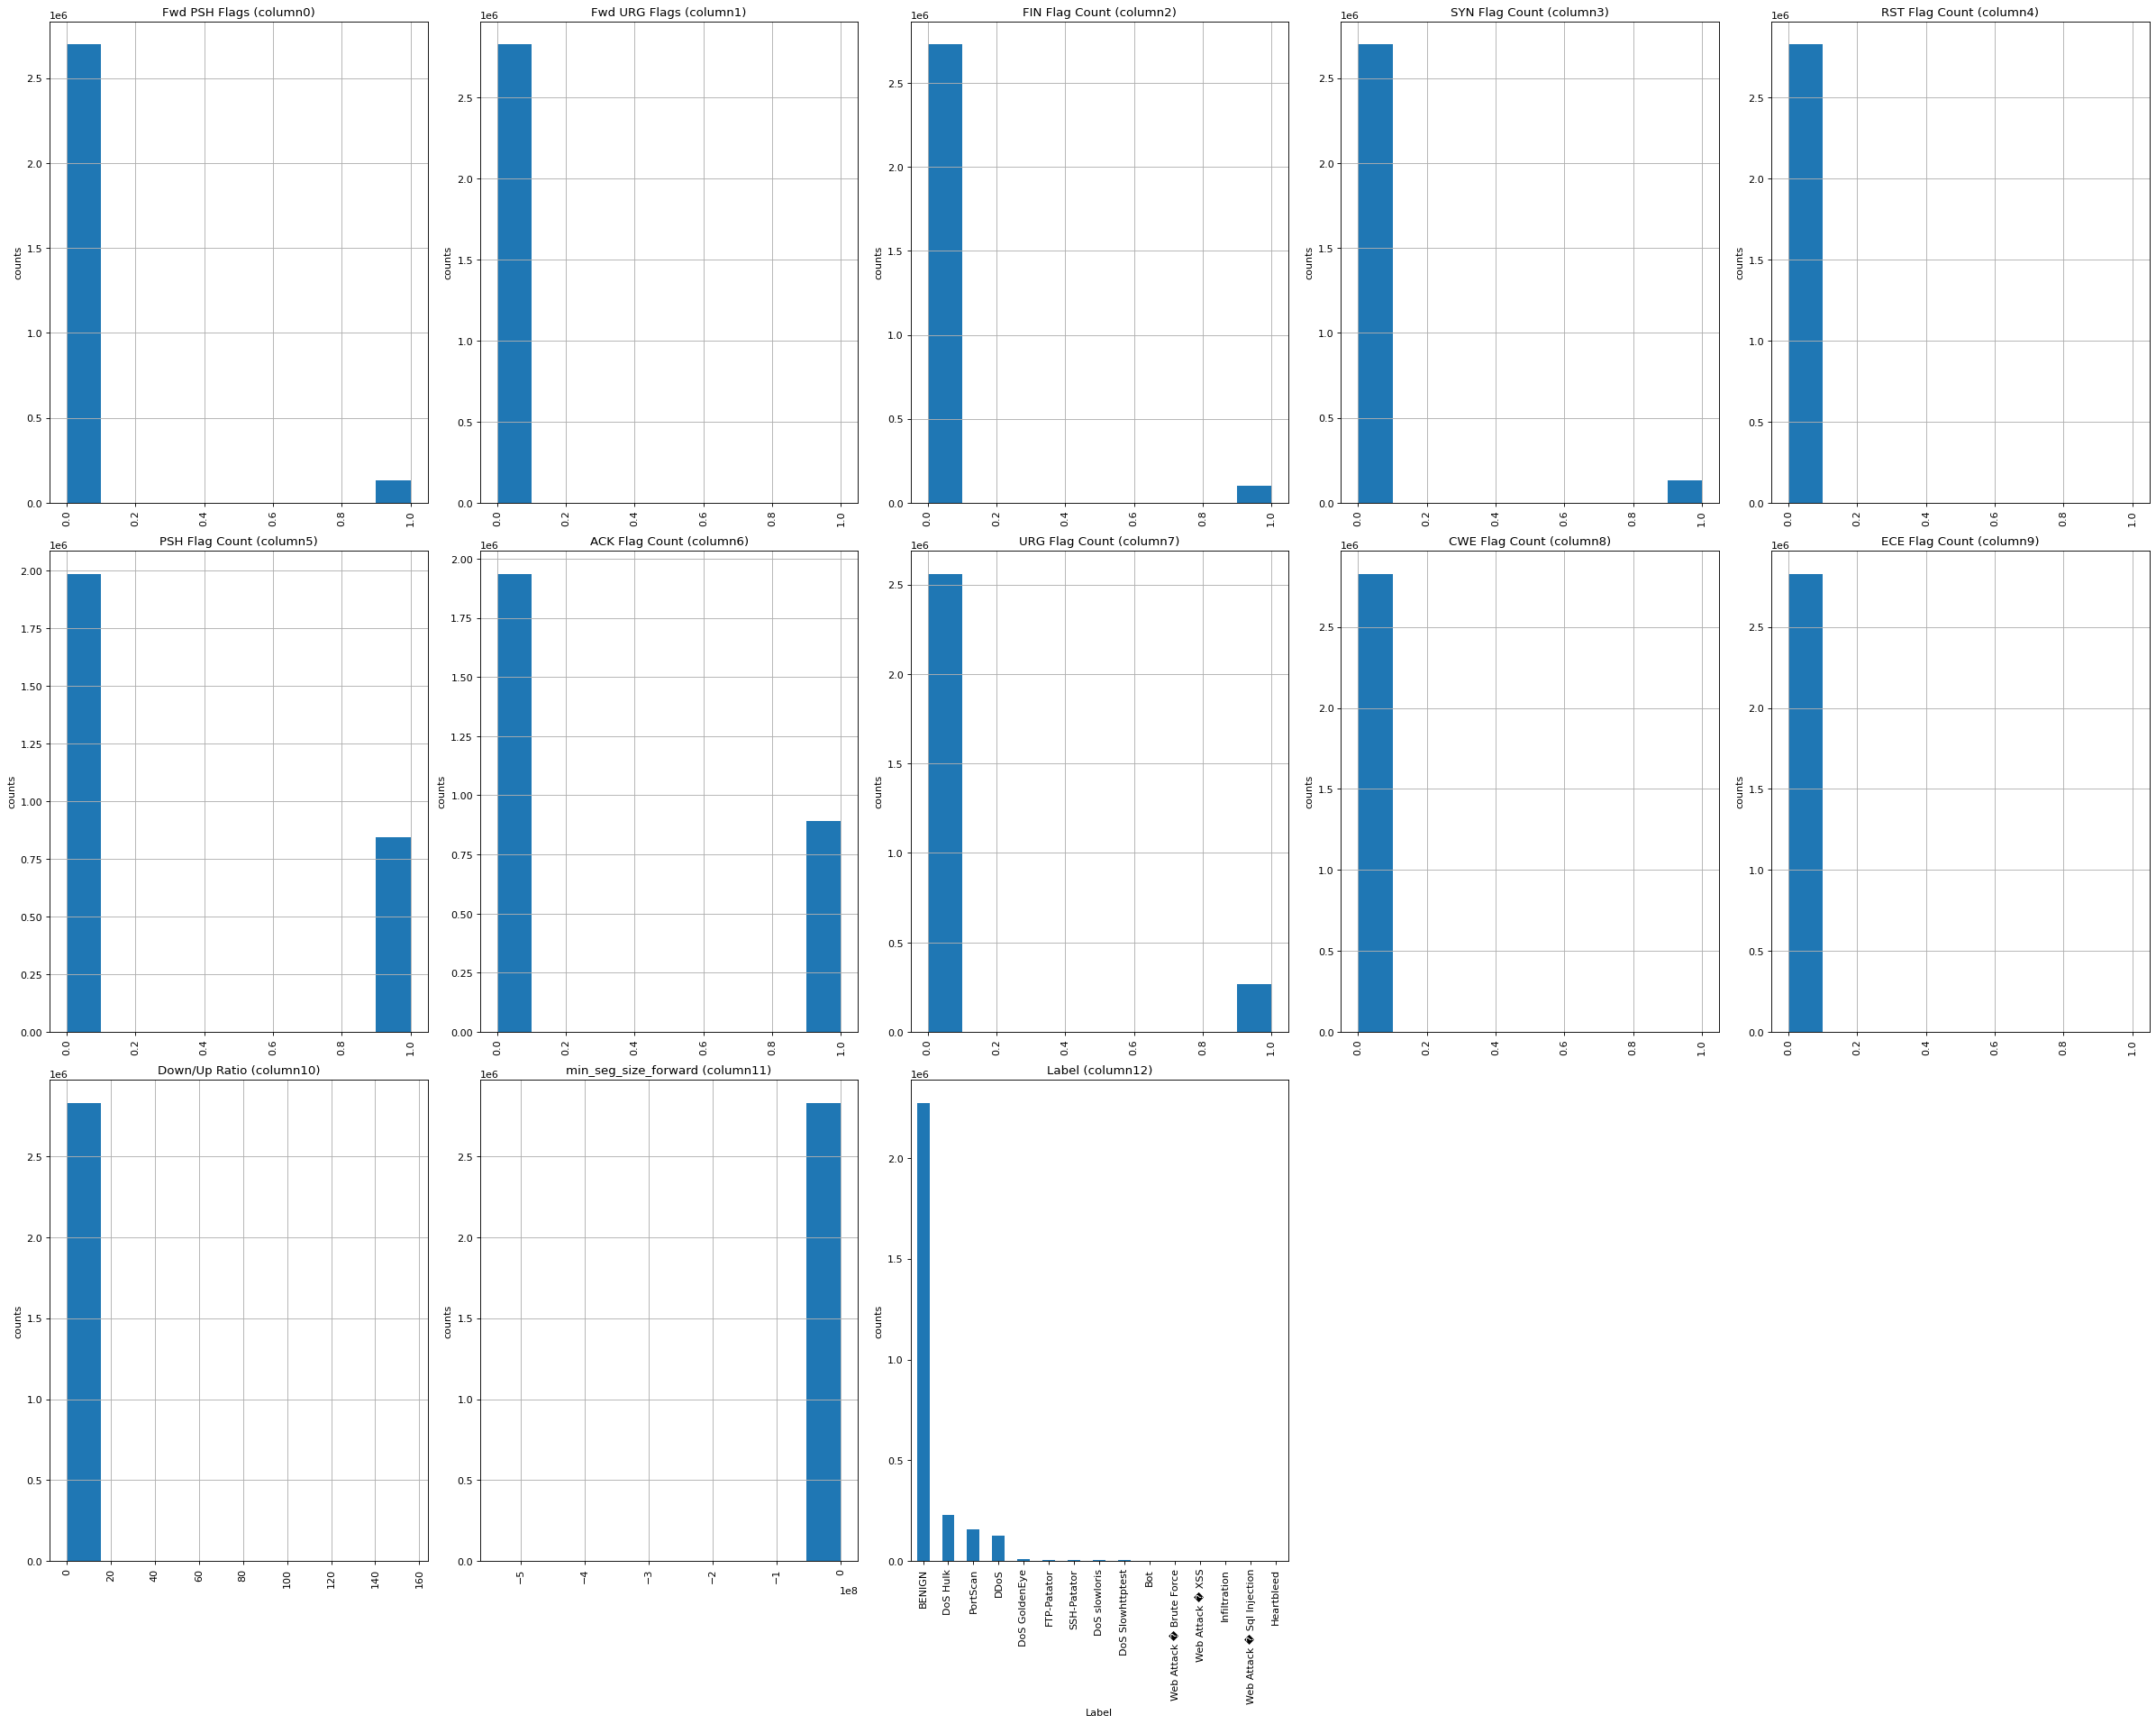

In [12]:
plt.rcParams['figure.figsize']=(30,30)
plot_per_column_distribution(df,79,5)

In [13]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

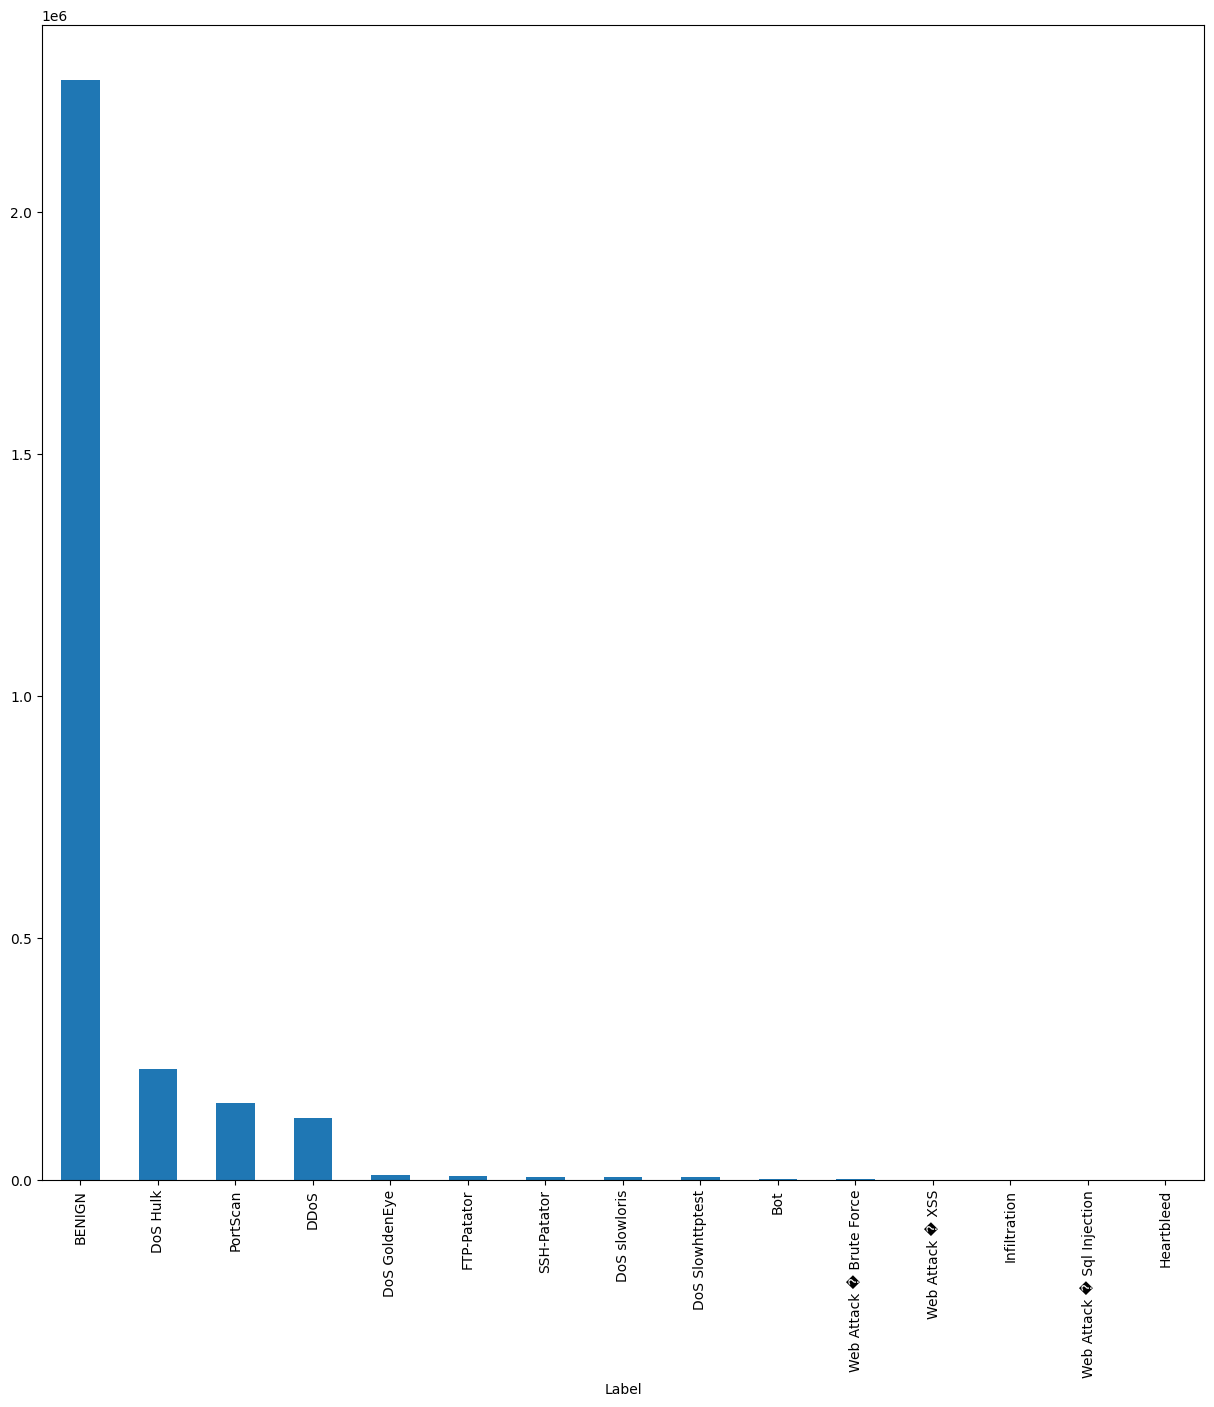

In [14]:
plt.rcParams['figure.figsize']=(15,15)
bar_graph("Label")

C:\Users\naras\AppData\Local\Temp\ipykernel_39872\425537385.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sns.distplot(a=df['Flow Duration'])


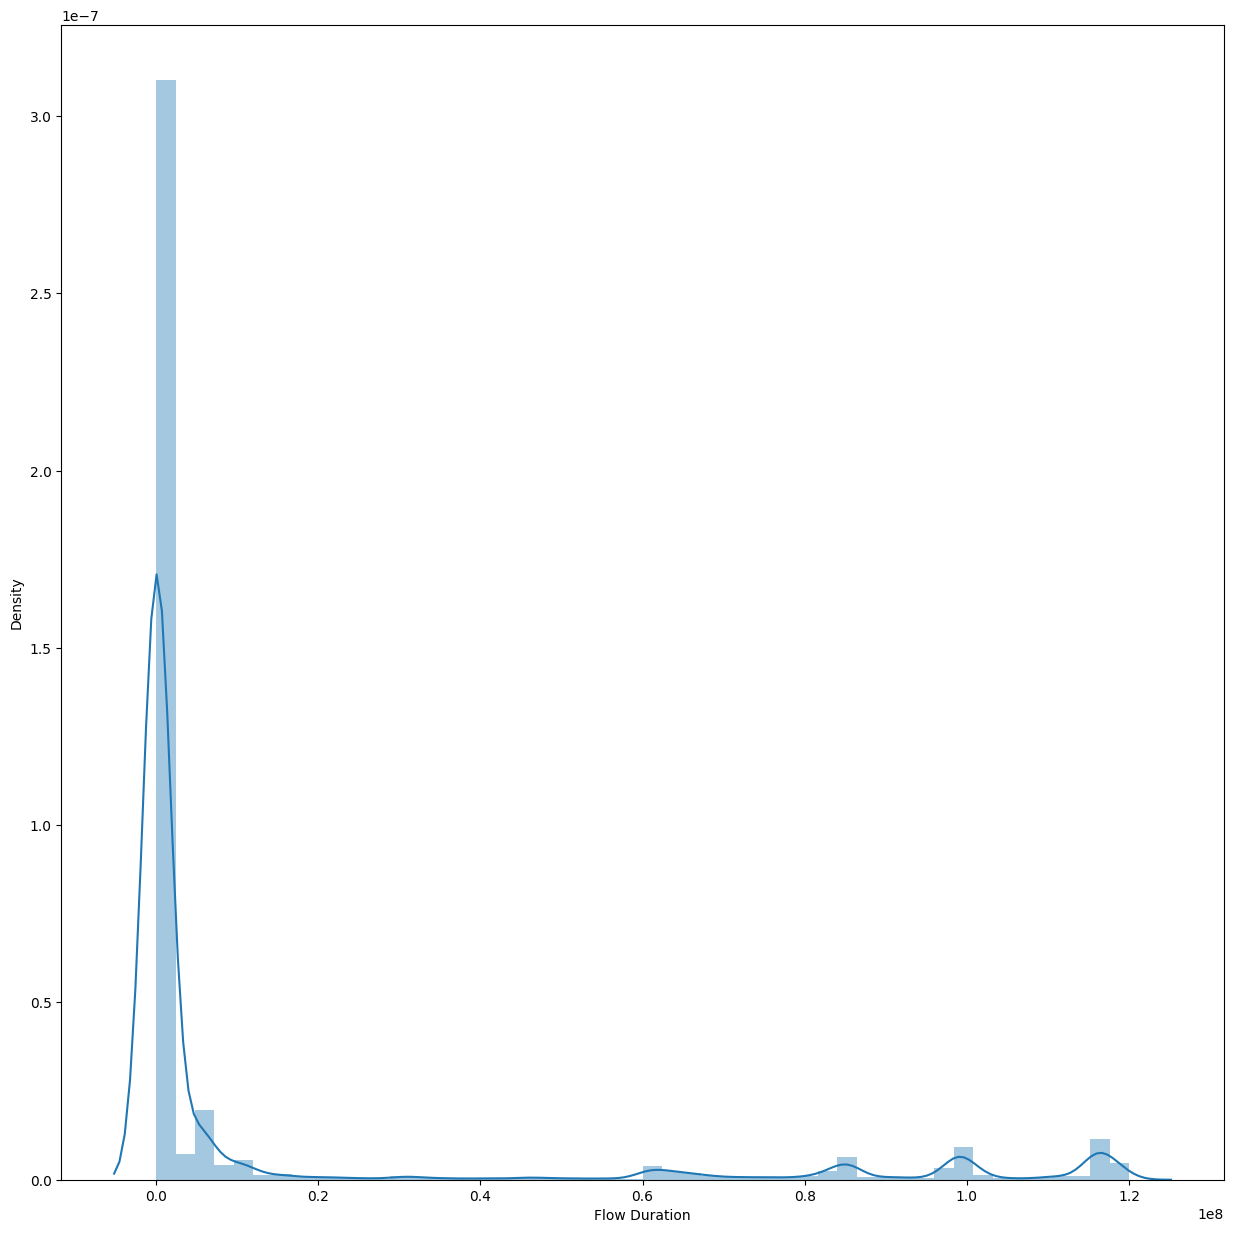

In [15]:
import seaborn as sns
p=sns.distplot(a=df['Flow Duration'])
plt.show()

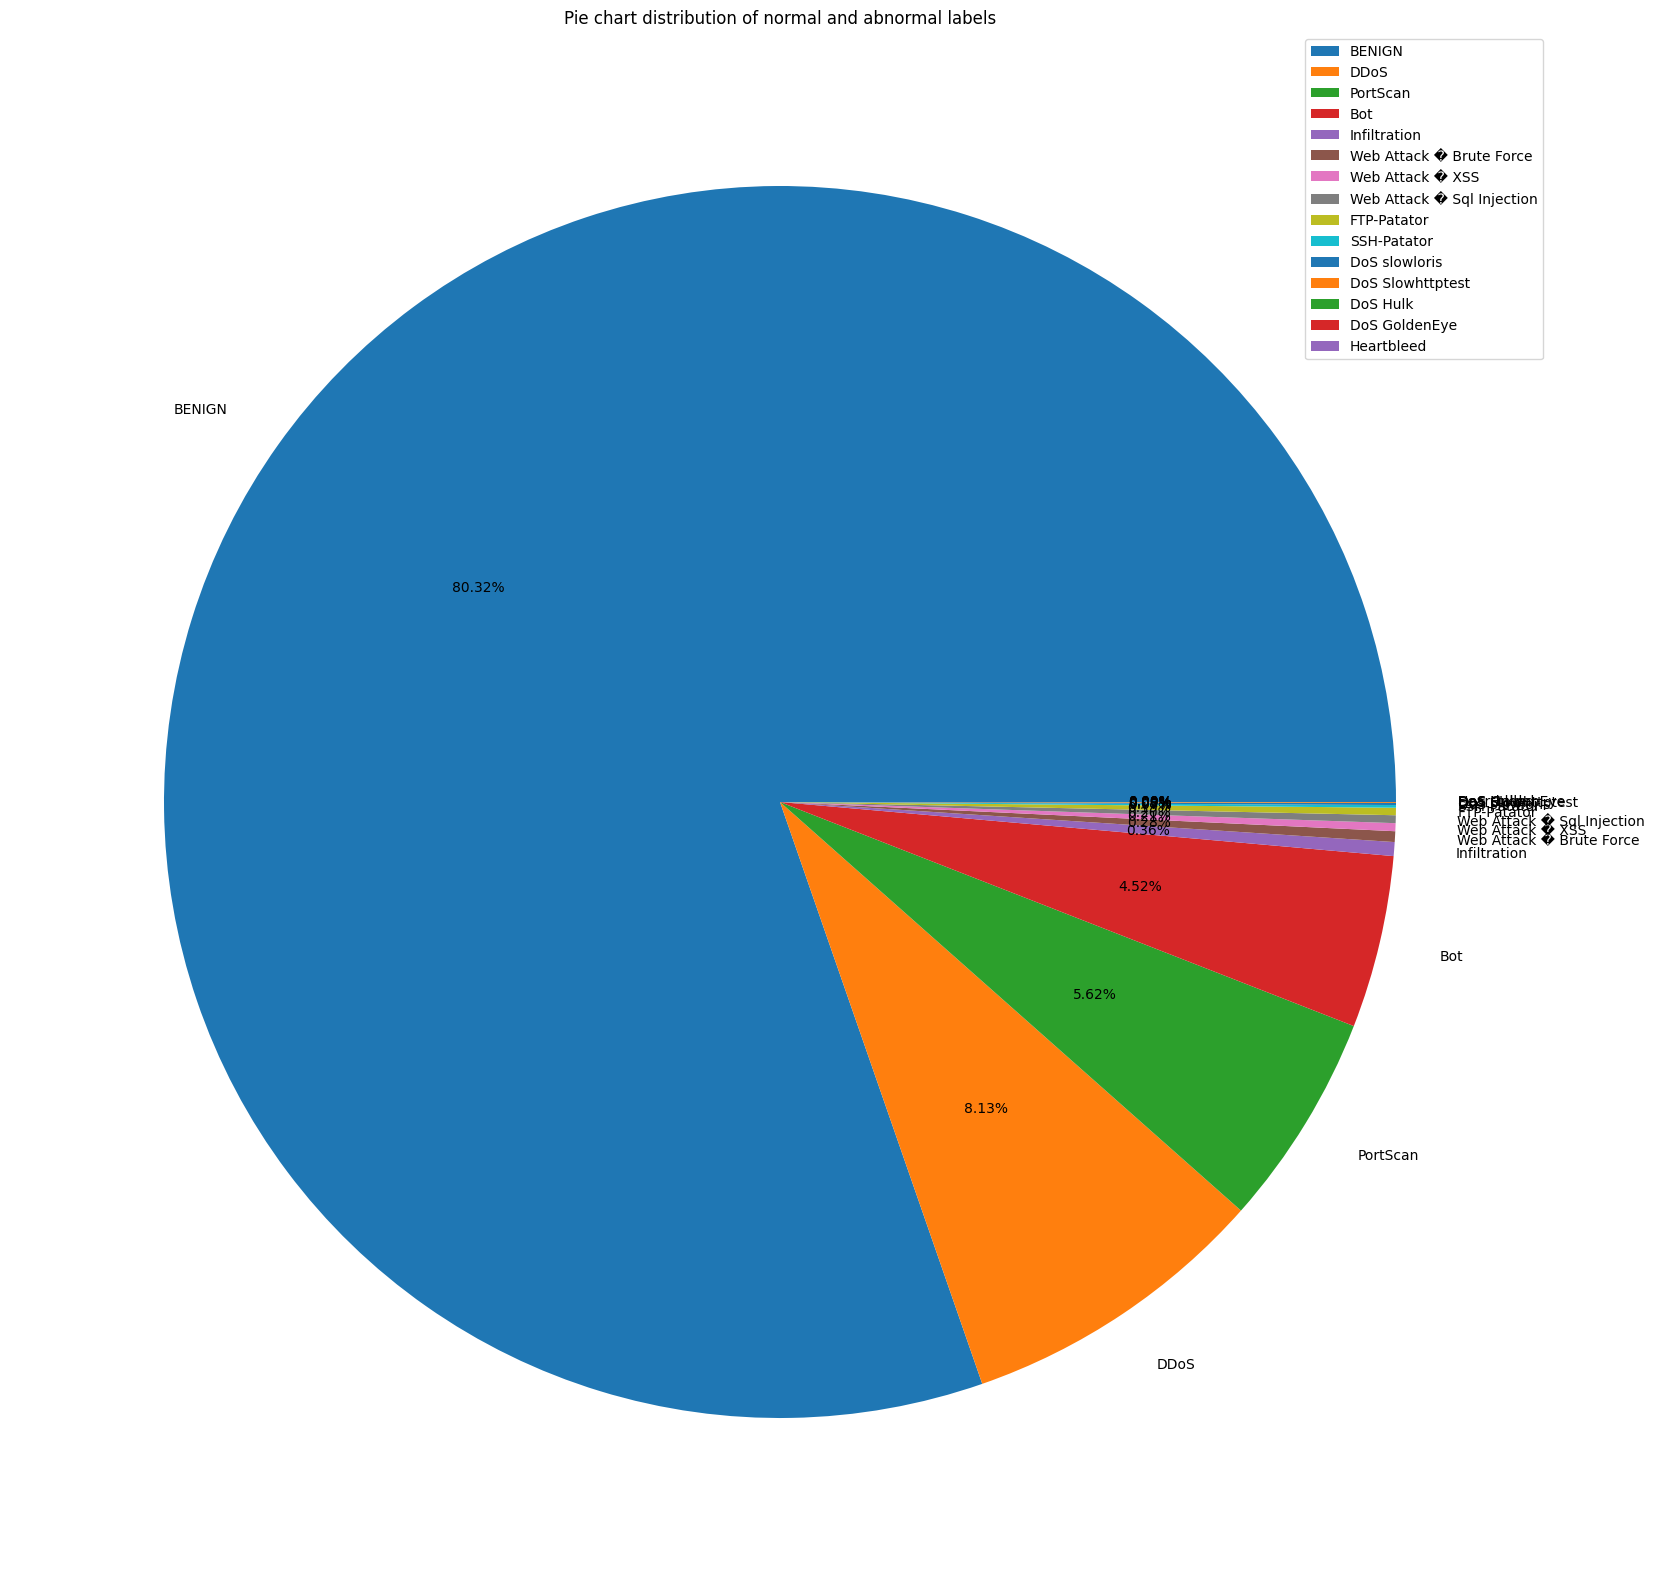

In [16]:
plt.figure(figsize=(20,20))
plt.pie(df['Label'].value_counts(),labels=df['Label'].unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

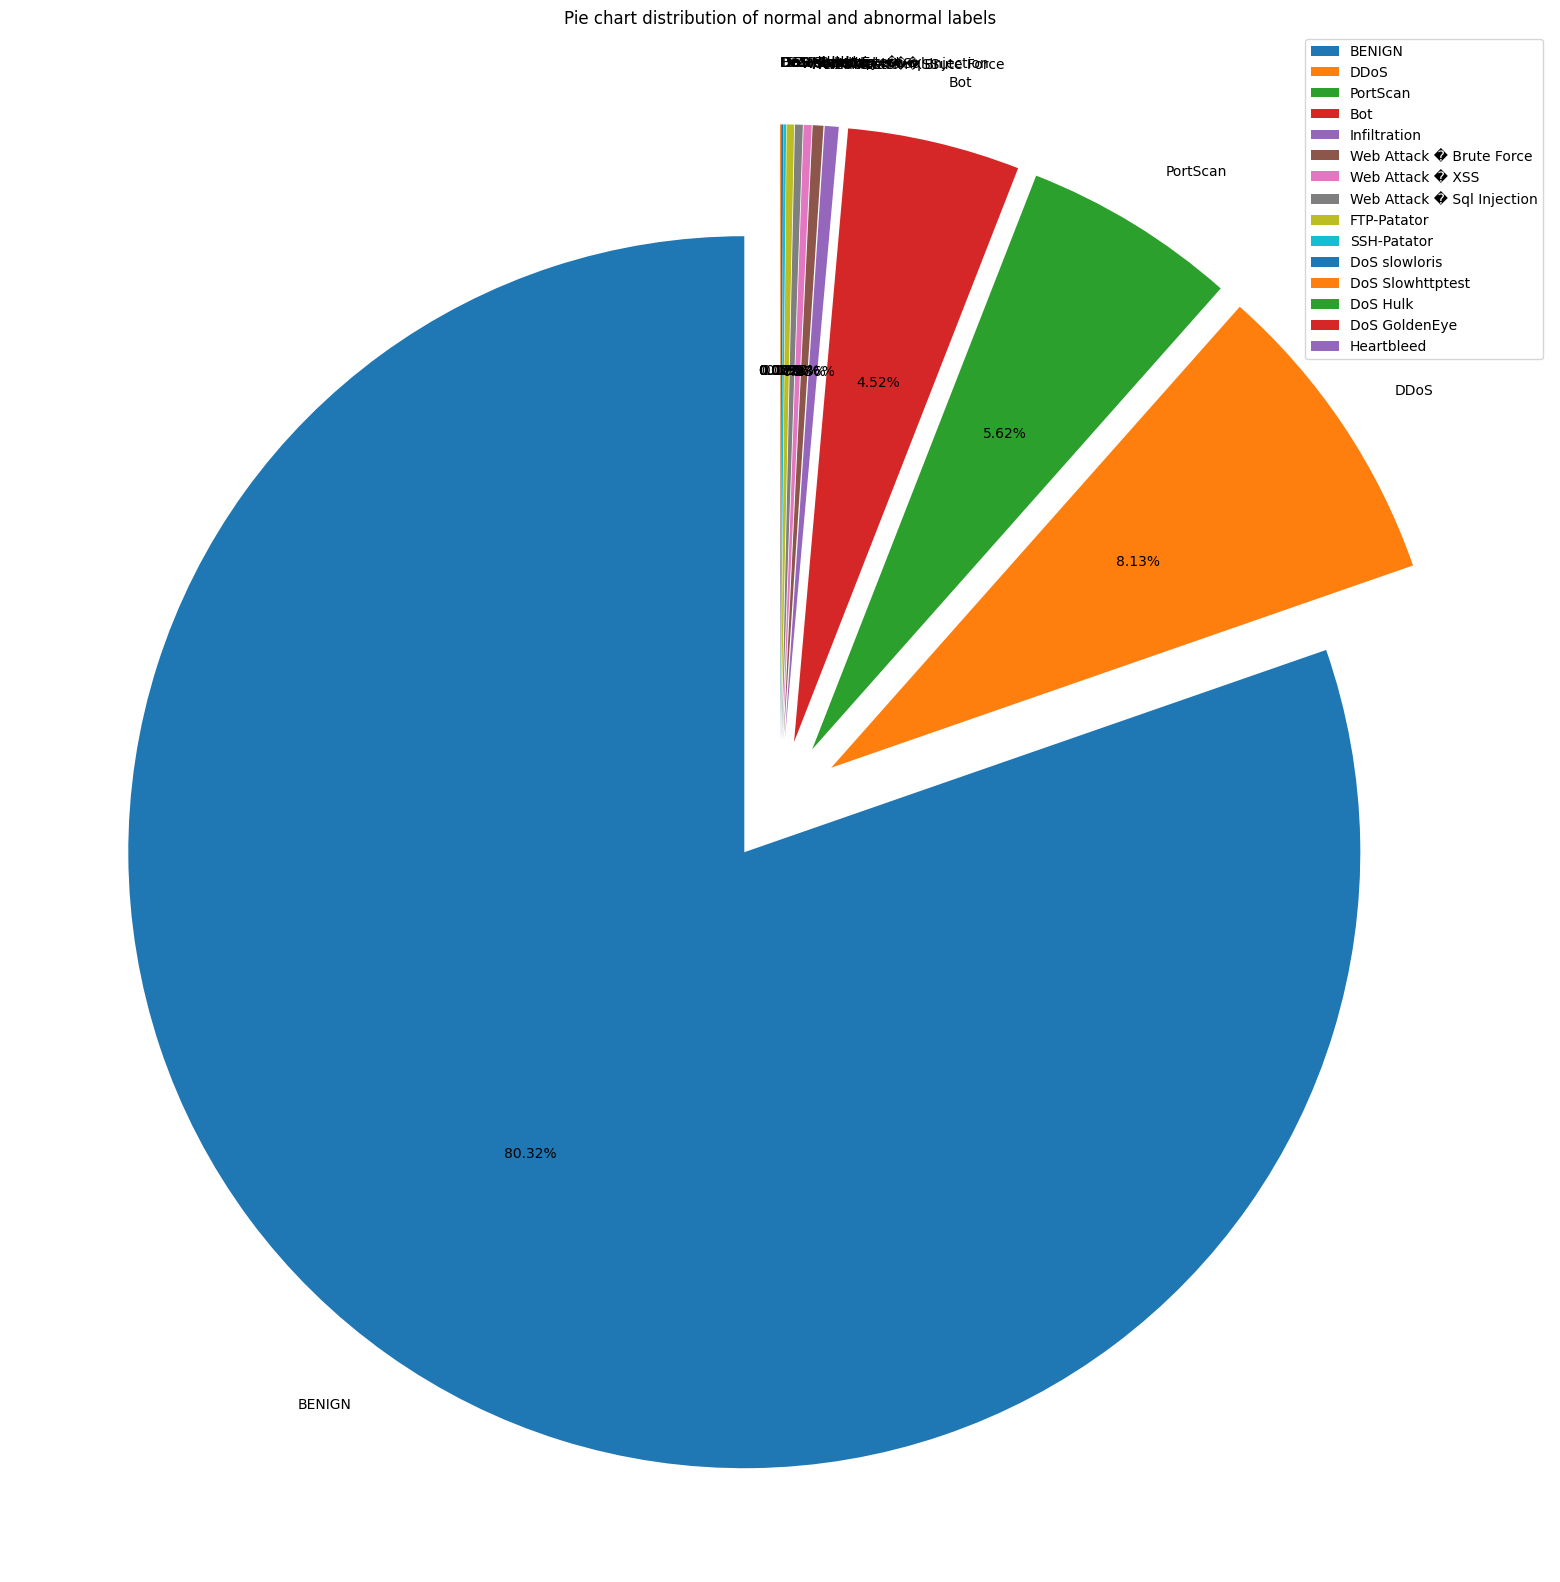

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
labels = df['Label'].unique()
sizes=df['Label'].value_counts()
explode=(0.1,)*len(labels)
plt.pie(sizes,labels=labels,autopct='%0.2f%%',explode=explode,startangle=90)
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend(labels,loc="best")
plt.show()

In [18]:
df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [19]:
df.shape

(2520798, 79)

In [20]:
import pandas as pd

# Assuming df is your DataFrame with the given dataset

# List of classes to keep all records for
classes_to_keep = [
    'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris', 'DoS Slowhttptest',
    'Bot', 'Web Attack Brute Force', 'Web Attack XSS', 'Infiltration', 
    'Web Attack Sql Injection', 'Heartbleed'
]

# List of classes to limit to 100,000 records
classes_to_limit = ['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS']

# Filter rows for classes to keep all records
df_keep = df[df['Label'].isin(classes_to_keep)]

# Filter rows for classes to limit to 100,000 records
df_limit = df[df['Label'].isin(classes_to_limit)].groupby('Label').head(50000)

# Concatenate the two DataFrames
result_df = pd.concat([df_keep, df_limit])

# Shuffle the resulting DataFrame to mix the classes
result_df = result_df.sample(frac=1, random_state=42).reset_index(drop=True)



In [21]:
result_df.shape

(232044, 79)

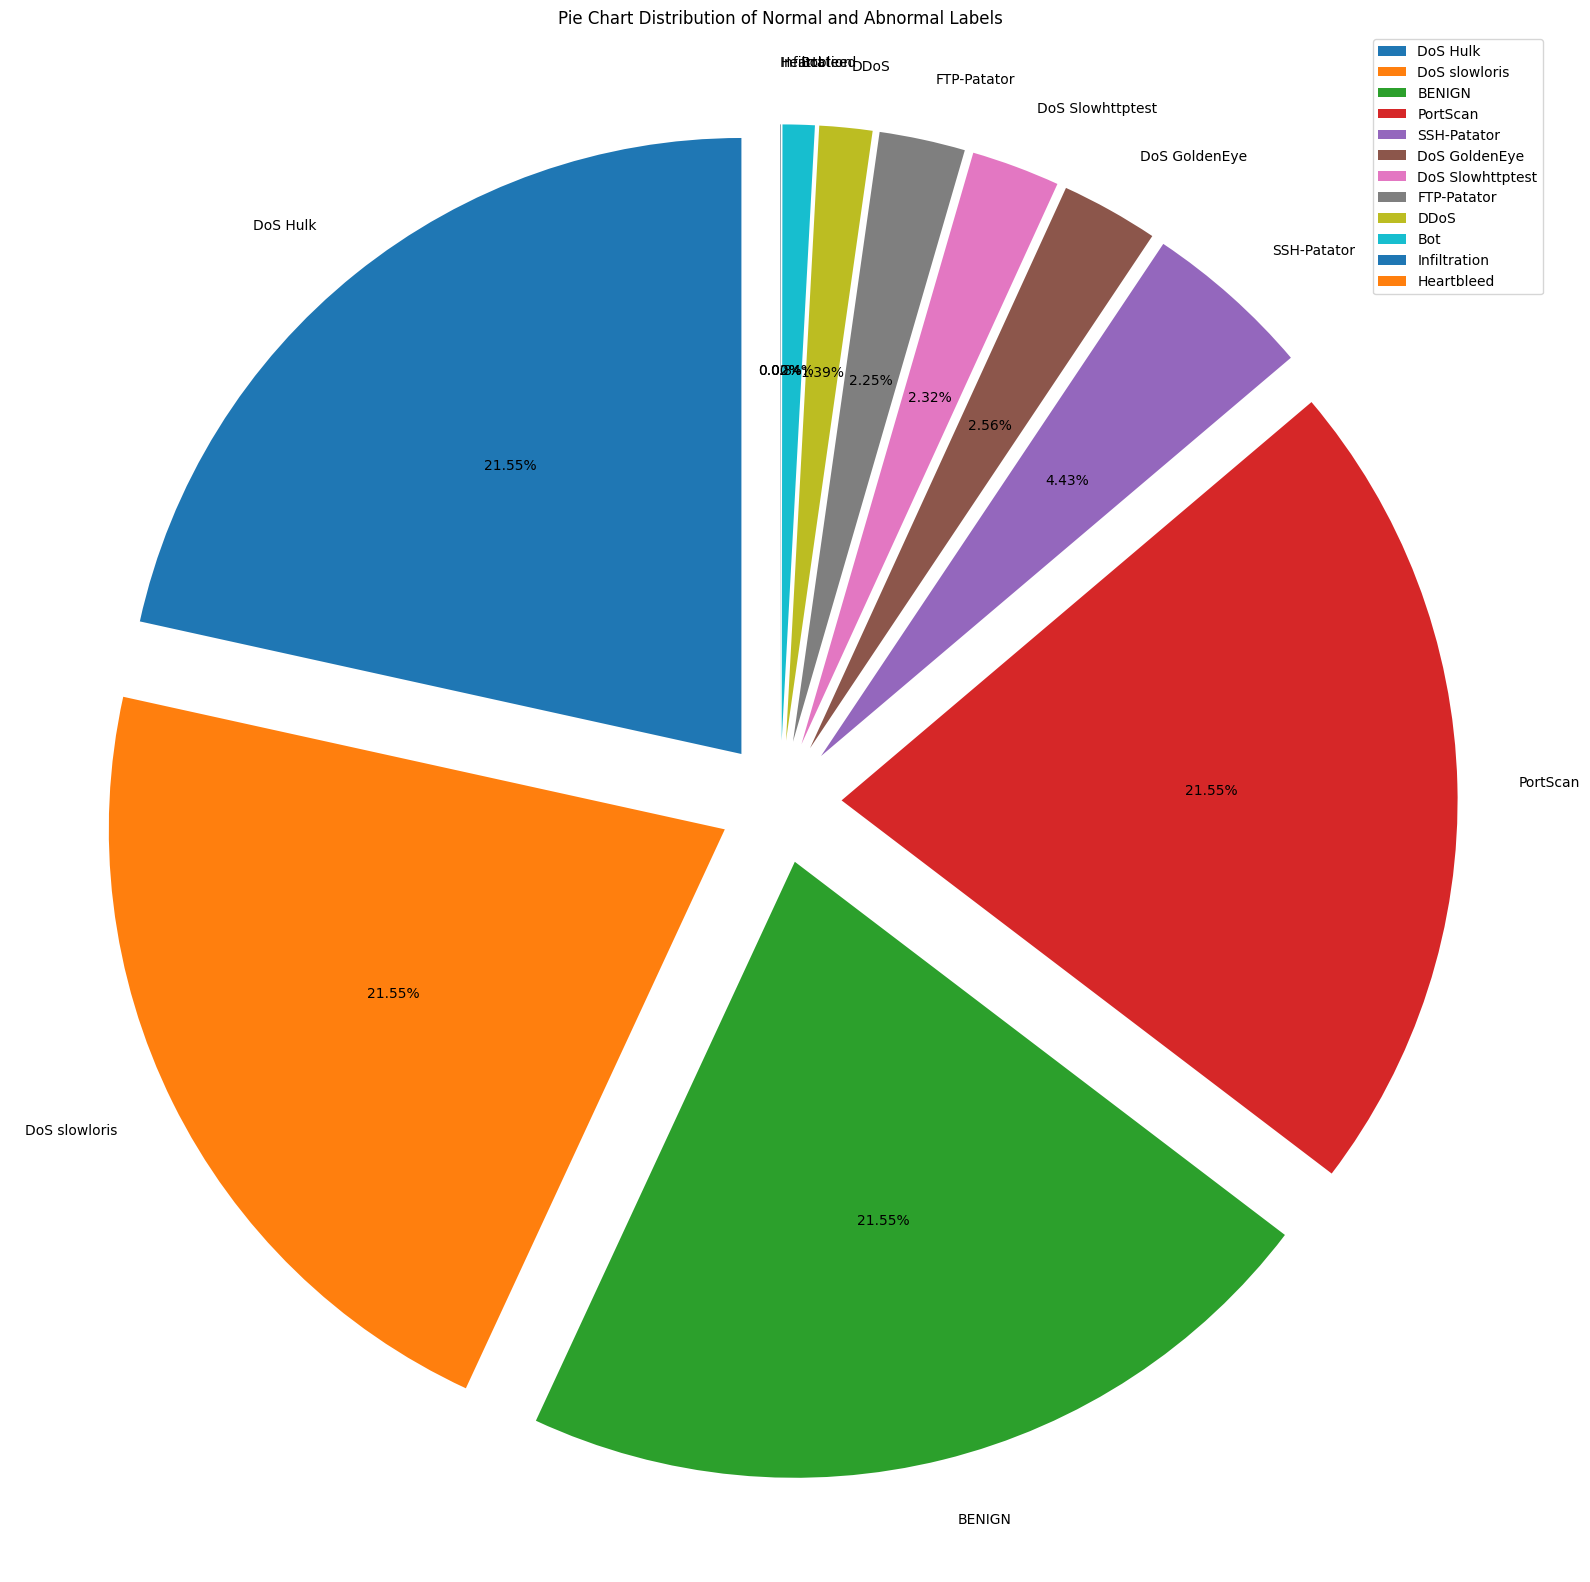

In [22]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(20, 20))

# Pie chart distribution of normal and abnormal labels
labels = result_df['Label'].unique()
sizes = result_df['Label'].value_counts() # Get label counts

explode = (0.1,) * len(labels)  # Explode all slices slightly

# Create pie chart
plt.pie(sizes, labels=labels, autopct='%0.2f%%', explode=explode, startangle=90)

# Title and legend
plt.title("Pie Chart Distribution of Normal and Abnormal Labels")
plt.legend(labels, loc="best")

# Show the plot
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of your DataFrame
df_encoded = result_df.copy()

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the "Label" column, and assign the transformed values to a new column
df_encoded['Label'] = le.fit_transform(result_df['Label'])

# Print the mapping of original labels to encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:")
print(label_mapping)

# Display the modified DataFrame
print("\nEncoded DataFrame:")
df_encoded.head()


Label Mapping:
{'BENIGN': 0, 'Bot': 1, 'DDoS': 2, 'DoS GoldenEye': 3, 'DoS Hulk': 4, 'DoS Slowhttptest': 5, 'DoS slowloris': 6, 'FTP-Patator': 7, 'Heartbleed': 8, 'Infiltration': 9, 'PortScan': 10, 'SSH-Patator': 11}

Encoded DataFrame:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,145630,3,6,308,11595,308,0,102.666667,177.823883,...,32,0.0,0.0,0,0,0.0,0.0,0,0,4
1,80,3000360,3,0,0,0,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,6
2,62532,81279060,6,10,11613,68,10135,0,1935.500000,4058.890772,...,20,40295.0,0.0,40295,40295,80300000.0,0.0,80300000,80300000,0
3,14000,95,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,10
4,80,99462755,9,6,304,11595,304,0,33.777778,101.333333,...,32,1016.0,0.0,1016,1016,99300000.0,0.0,99300000,99300000,4


In [24]:
import joblib
encoder_file_path = 'label_encoder.pkl'
joblib.dump(le, encoder_file_path)

['label_encoder.pkl']

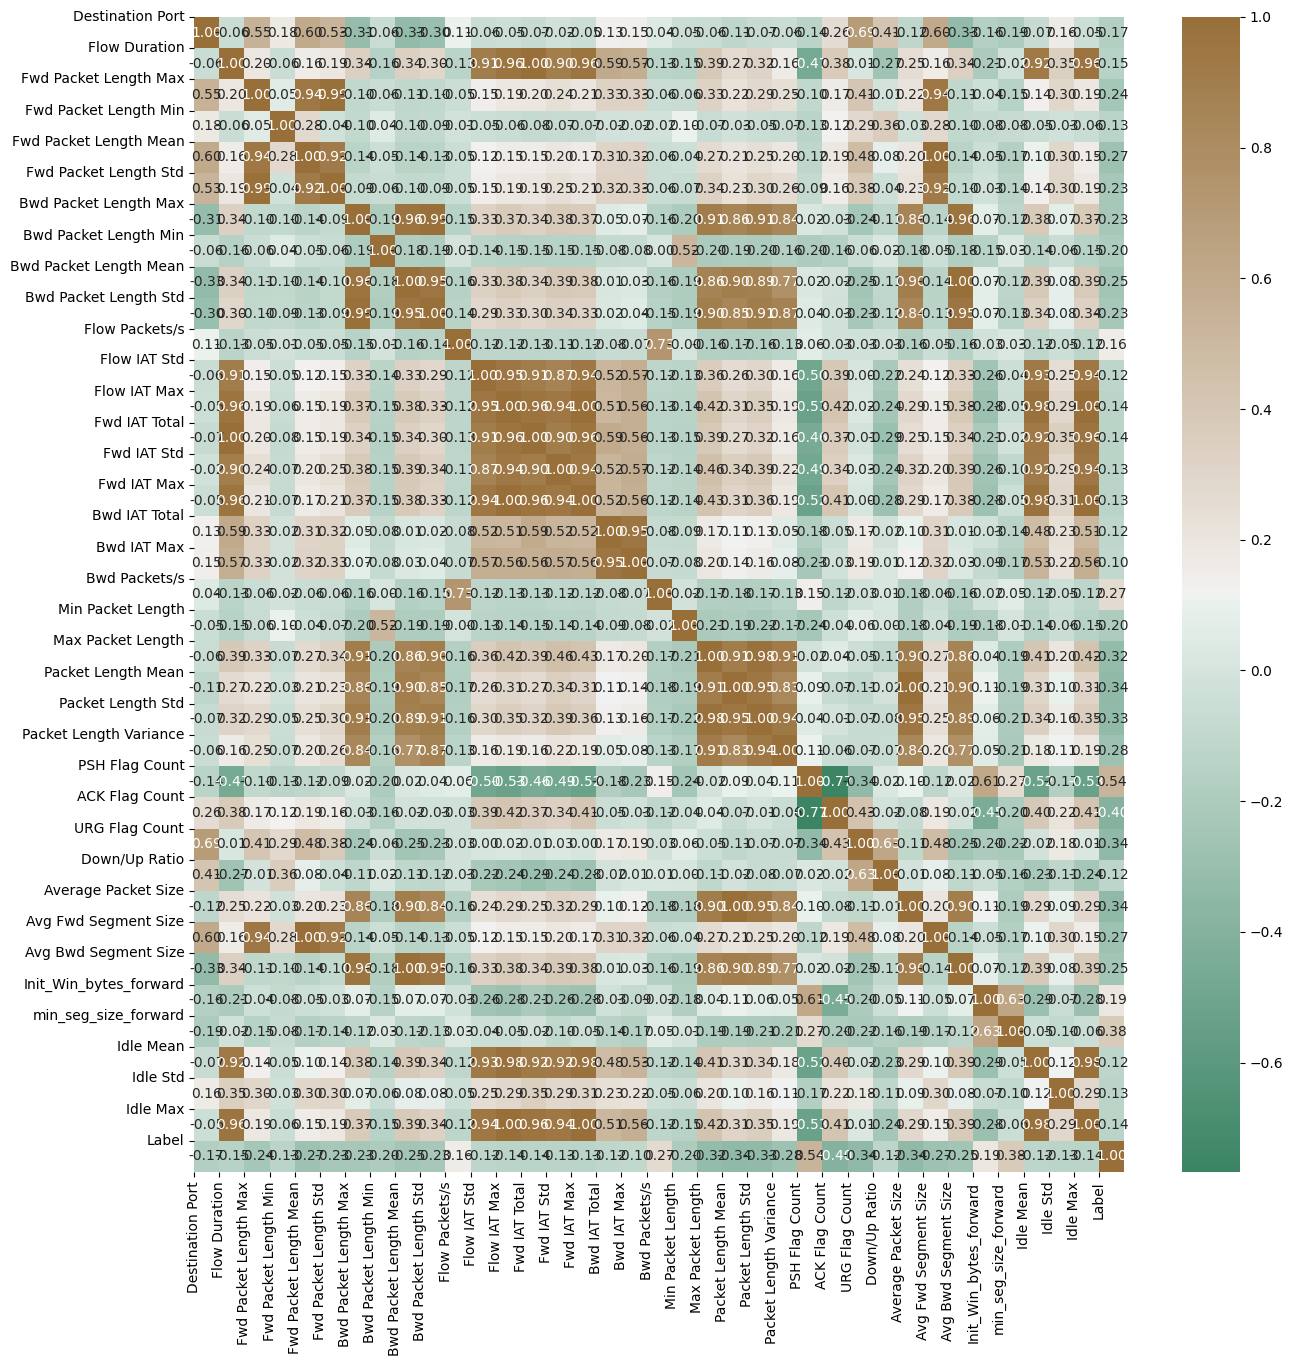

In [25]:
import seaborn as sns
# Set the correlation threshold
correlation_threshold = 0.1  # You can adjust this threshold as needed

# Calculate the correlation matrix
corr = df_encoded.corr()

# Filter columns based on correlation threshold
columns_to_include = corr.columns[ abs(corr['Label']) >= correlation_threshold]
filtered_corr = corr.loc[columns_to_include, columns_to_include]

# Plot the filtered correlation heatmap
fig, ax = plt.subplots(figsize=(15, 15))  # Set figure size

# Define colormap
colormap = sns.diverging_palette(150, 50, as_cmap=True)

# Create heatmap
sns.heatmap(filtered_corr, cmap=colormap, annot=True, fmt=".2f")

plt.xticks(range(len(filtered_corr.columns)),filtered_corr.columns)
plt.yticks(range(len(filtered_corr.columns)),filtered_corr.columns)


# Show plot
plt.show()


In [26]:
X=df_encoded.drop('Label',axis=1)
y=df_encoded['Label']                  

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_features = feature_importance_df.head(20)['Feature'].tolist()

# Filter your original DataFrame to include only the top 20 features
df_top_features = df_encoded[top_features + ['Label']]

# Display the DataFrame with top features
df_top_features.head()


,Fwd Packet Length Mean,Subflow Fwd Bytes,Fwd Packet Length Max,Total Length of Fwd Packets,Flow IAT Max,Flow Duration,Total Length of Bwd Packets,Subflow Bwd Bytes,Bwd Packets/s,Average Packet Size,...,Flow Packets/s,Destination Port,Avg Fwd Segment Size,Init_Win_bytes_backward,Bwd Packet Length Max,Fwd Packet Length Std,Packet Length Mean,Bwd Packet Length Std,Fwd Header Length.1,Label
0,102.666667,308,308,308,135123,145630,11595,11595,41.200302,1322.555556,...,61.800453,80,102.666667,235,7240,177.823883,1190.300000,2845.835677,104,4
1,0.000000,0,0,0,2003973,3000360,0,0,0.000000,0.000000,...,0.999880,80,0.000000,-1,0,0.000000,0.000000,0.000000,120,6
2,1935.500000,11613,10135,11613,80300000,81279060,68,68,0.123033,730.437500,...,0.196853,62532,1935.500000,256,20,4058.890772,687.470588,5.006662,132,0
3,2.000000,2,2,2,95,95,6,6,10526.315790,5.000000,...,21052.631580,14000,2.000000,0,6,0.000000,3.333333,0.000000,24,10
4,33.777778,304,304,304,99300000,99462755,11595,11595,0.060324,793.266667,...,0.150810,80,33.777778,235,5792,101.333333,743.687500,2181.008184,296,4


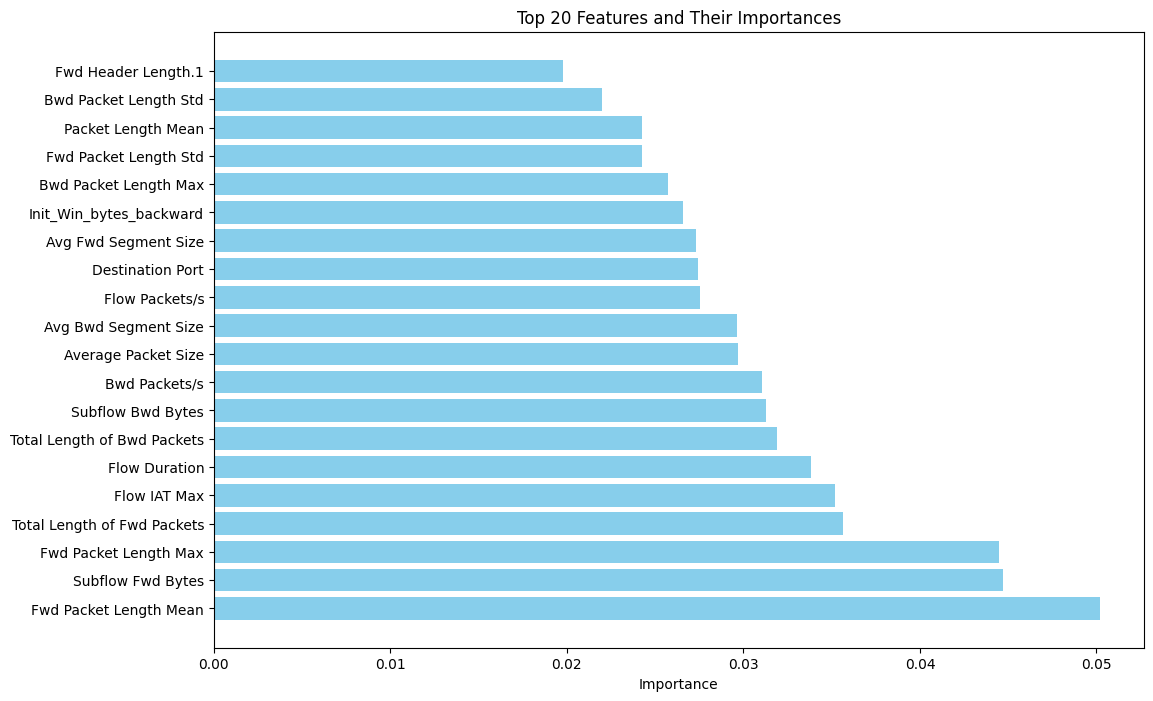

In [28]:
import matplotlib.pyplot as plt

# Create a bar plot of the top 20 features and their importances
plt.figure(figsize=(12,8))
plt.barh(top_features, feature_importance_df.head(20)['Importance'], color='skyblue')  # Reverse for better visualization
plt.xlabel('Importance')
plt.title('Top 20 Features and Their Importances')

plt.show()


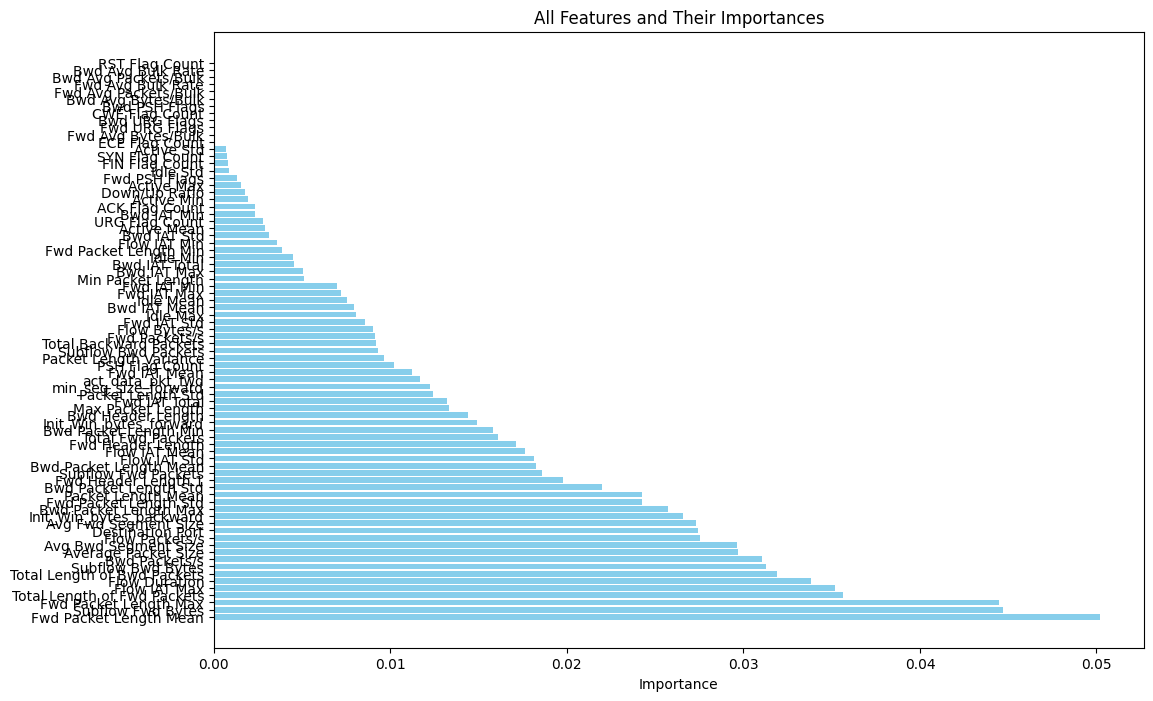

In [29]:
import matplotlib.pyplot as plt

# Assuming feature_importance_df is the DataFrame with feature importances
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of all features and their importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')  # Reverse for better visualization
plt.xlabel('Importance')
plt.title('All Features and Their Importances')

plt.show()


In [30]:
df_top_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232044 entries, 0 to 232043
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Fwd Packet Length Mean       232044 non-null  float64
 1   Subflow Fwd Bytes            232044 non-null  int64  
 2   Fwd Packet Length Max        232044 non-null  int64  
 3   Total Length of Fwd Packets  232044 non-null  int64  
 4   Flow IAT Max                 232044 non-null  int64  
 5   Flow Duration                232044 non-null  int64  
 6   Total Length of Bwd Packets  232044 non-null  int64  
 7   Subflow Bwd Bytes            232044 non-null  int64  
 8   Bwd Packets/s                232044 non-null  float64
 9   Average Packet Size          232044 non-null  float64
 10  Avg Bwd Segment Size         232044 non-null  float64
 11  Flow Packets/s               232044 non-null  float64
 12  Destination Port             232044 non-null  int64  
 13 

In [31]:
# Assuming 'Label' is the target variable
X_top_features = df_top_features.drop('Label', axis=1) 
y_top_features = df_top_features['Label']


X_train, X_test, y_train, y_test = train_test_split(X_top_features, y_top_features, test_size=0.2, random_state=42)


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185635 entries, 187652 to 121958
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Fwd Packet Length Mean       185635 non-null  float64
 1   Subflow Fwd Bytes            185635 non-null  int64  
 2   Fwd Packet Length Max        185635 non-null  int64  
 3   Total Length of Fwd Packets  185635 non-null  int64  
 4   Flow IAT Max                 185635 non-null  int64  
 5   Flow Duration                185635 non-null  int64  
 6   Total Length of Bwd Packets  185635 non-null  int64  
 7   Subflow Bwd Bytes            185635 non-null  int64  
 8   Bwd Packets/s                185635 non-null  float64
 9   Average Packet Size          185635 non-null  float64
 10  Avg Bwd Segment Size         185635 non-null  float64
 11  Flow Packets/s               185635 non-null  float64
 12  Destination Port             185635 non-null  int64  
 13 

In [33]:
X_top_features.to_csv('X_top_features.csv', index=False)  


In [34]:
y_top_features.to_csv('y_top_features.csv', index=False)

In [35]:
import numpy as np

print("Infinite values in X_train:", np.any(np.isinf(X_train)))
print("NaN values in X_train:", np.any(np.isnan(X_train)))


Infinite values in X_train: False
NaN values in X_train: False


In [36]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [37]:
import numpy as np
import joblib
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import issparse

# Ensure X_train and X_test are NumPy arrays
def ensure_numpy_array(data):
    if issparse(data):
        return data.toarray()  # Convert sparse matrix to dense
    return np.array(data)  # Convert to NumPy array if it's not already

# Function to print accuracy metrics
def print_all_accuracy_matric(algorithm, name):
    y_train_pred = algorithm.predict(X_train)
    y_test_pred = algorithm.predict(X_test)

    # Accuracy
    acc_train = metrics.accuracy_score(y_train, y_train_pred)
    acc_test = metrics.accuracy_score(y_test, y_test_pred)
    print(f"{name}: Accuracy on Training Data: {acc_train:.3f}")
    print(f"{name}: Accuracy on Test Data: {acc_test:.3f}\n")

    # F1 Score
    f1_train = metrics.f1_score(y_train, y_train_pred, average='macro')
    f1_test = metrics.f1_score(y_test, y_test_pred, average='macro')
    print(f"{name}: F1 Score on Training Data: {f1_train:.3f}")
    print(f"{name}: F1 Score on Test Data: {f1_test:.3f}\n")

    # Recall Score
    recall_train = metrics.recall_score(y_train, y_train_pred, average='macro')
    recall_test = metrics.recall_score(y_test, y_test_pred, average='macro')
    print(f"{name}: Recall Score on Training Data: {recall_train:.3f}")
    print(f"{name}: Recall Score on Test Data: {recall_test:.3f}\n")

    # Precision Score
    precision_train = metrics.precision_score(y_train, y_train_pred, average='macro')
    precision_test = metrics.precision_score(y_test, y_test_pred, average='macro')
    print(f"{name}: Precision Score on Training Data: {precision_train:.3f}")
    print(f"{name}: Precision Score on Test Data: {precision_test:.3f}\n")

    # Classification Report
    print("\n\nClassification Report\n")
    print(metrics.classification_report(y_test, y_test_pred))
    print("\n\n")



In [38]:
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clfd.fit(X_train,y_train)
print_all_accuracy_matric(clfd,'DecisionTreeClassifier')
joblib.dump(clfd, 'DecisionTreeClassifier.joblib')

DecisionTreeClassifier: Accuracy on Training Data: 0.911
DecisionTreeClassifier: Accuracy on Test Data: 0.912

DecisionTreeClassifier: F1 Score on Training Data: 0.619
DecisionTreeClassifier: F1 Score on Test Data: 0.619

DecisionTreeClassifier: Recall Score on Training Data: 0.624
DecisionTreeClassifier: Recall Score on Test Data: 0.625

DecisionTreeClassifier: Precision Score on Training Data: 0.656
DecisionTreeClassifier: Precision Score on Test Data: 0.649



Classification Report

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     10055
           1       0.67      0.27      0.38       366
           2       0.94      1.00      0.97      9894
           3       0.98      0.50      0.67      2072
           4       0.96      0.96      0.96     10124
           5       0.29      0.51      0.37      1006
           6       0.29      0.40      0.34      1071
           7       0.80      1.00      0.89      1176
           8       0.0

['DecisionTreeClassifier.joblib']

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
print_all_accuracy_matric(rf_clf,'RandomForestClassifier')
joblib.dump(rf_clf, 'RandomForestClassifier.joblib')

RandomForestClassifier: Accuracy on Training Data: 0.999
RandomForestClassifier: Accuracy on Test Data: 0.996

RandomForestClassifier: F1 Score on Training Data: 1.000
RandomForestClassifier: F1 Score on Test Data: 0.992

RandomForestClassifier: Recall Score on Training Data: 1.000
RandomForestClassifier: Recall Score on Test Data: 0.994

RandomForestClassifier: Precision Score on Training Data: 1.000
RandomForestClassifier: Precision Score on Test Data: 0.991



Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10055
           1       0.91      0.95      0.93       366
           2       1.00      1.00      1.00      9894
           3       0.99      1.00      1.00      2072
           4       1.00      0.99      1.00     10124
           5       1.00      1.00      1.00      1006
           6       1.00      1.00      1.00      1071
           7       1.00      1.00      1.00      1176
           8       1.0

['RandomForestClassifier.joblib']

In [40]:
from sklearn.neighbors import KNeighborsClassifier


# Ensure the feature matrices are in the correct format
X_train = ensure_numpy_array(X_train)
X_test = ensure_numpy_array(X_test)

# Train the KNeighborsClassifier model
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

# Predict and evaluate
print_all_accuracy_matric(knn_clf, 'KNeighborsClassifier')

y_pred = knn_clf.predict(X_test)
# Save the model
joblib.dump(knn_clf, 'KNeighborsClassifier.joblib')




KNeighborsClassifier: Accuracy on Training Data: 0.983
KNeighborsClassifier: Accuracy on Test Data: 0.967

KNeighborsClassifier: F1 Score on Training Data: 0.935
KNeighborsClassifier: F1 Score on Test Data: 0.876

KNeighborsClassifier: Recall Score on Training Data: 0.915
KNeighborsClassifier: Recall Score on Test Data: 0.873

KNeighborsClassifier: Precision Score on Training Data: 0.973
KNeighborsClassifier: Precision Score on Test Data: 0.879



Classification Report

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     10055
           1       0.83      0.81      0.82       366
           2       0.96      0.96      0.96      9894
           3       0.95      0.94      0.94      2072
           4       0.97      0.98      0.98     10124
           5       0.97      0.98      0.97      1006
           6       0.95      0.95      0.95      1071
           7       0.99      0.98      0.99      1176
           8       1.00      1.00     

['KNeighborsClassifier.joblib']

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline  # Corrected import
import joblib

# Train the GaussianNB model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate the model
print_all_accuracy_matric(nb, 'Naive Bayes')  # Corrected function name

# Save the model
joblib.dump(nb, 'GaussianNB.joblib')


Naive Bayes: Accuracy on Training Data: 0.434
Naive Bayes: Accuracy on Test Data: 0.436

Naive Bayes: F1 Score on Training Data: 0.349
Naive Bayes: F1 Score on Test Data: 0.365

Naive Bayes: Recall Score on Training Data: 0.525
Naive Bayes: Recall Score on Test Data: 0.544

Naive Bayes: Precision Score on Training Data: 0.432
Naive Bayes: Precision Score on Test Data: 0.444



Classification Report

              precision    recall  f1-score   support

           0       1.00      0.18      0.31     10055
           1       0.01      0.02      0.01       366
           2       0.74      0.07      0.13      9894
           3       0.15      0.79      0.26      2072
           4       0.81      0.68      0.74     10124
           5       0.16      0.05      0.08      1006
           6       0.32      0.56      0.41      1071
           7       0.11      1.00      0.19      1176
           8       0.20      1.00      0.33         2
           9       0.22      0.57      0.32         7
  

['GaussianNB.joblib']

In [42]:
!pip install catboost


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import catboost
from catboost import CatBoostClassifier

# Initialize the CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=10,learning_rate=0.1,depth=6)  # Suppress verbose output

# Train the model
catboost_model.fit(X_train, y_train)

# Evaluate the model
print_all_accuracy_matric(catboost_model, 'CatBoostClassifier')

# Save the model
joblib.dump(nb, 'CatBoostClassifier.joblib')


0:	learn: 1.6174737	total: 1.49s	remaining: 13.4s
1:	learn: 1.3130701	total: 2.93s	remaining: 11.7s
2:	learn: 1.1100585	total: 4.47s	remaining: 10.4s
3:	learn: 0.9635175	total: 5.95s	remaining: 8.92s
4:	learn: 0.8487715	total: 7.31s	remaining: 7.31s
5:	learn: 0.7590834	total: 8.8s	remaining: 5.87s
6:	learn: 0.6775481	total: 10.1s	remaining: 4.31s
7:	learn: 0.6056328	total: 10.7s	remaining: 2.68s
8:	learn: 0.5496501	total: 11.7s	remaining: 1.3s
9:	learn: 0.4993718	total: 13.6s	remaining: 0us
CatBoostClassifier: Accuracy on Training Data: 0.955
CatBoostClassifier: Accuracy on Test Data: 0.955

CatBoostClassifier: F1 Score on Training Data: 0.685
CatBoostClassifier: F1 Score on Test Data: 0.683

CatBoostClassifier: Recall Score on Training Data: 0.677
CatBoostClassifier: Recall Score on Test Data: 0.675

CatBoostClassifier: Precision Score on Training Data: 0.702
CatBoostClassifier: Precision Score on Test Data: 0.702



Classification Report

              precision    recall  f1-score  

['CatBoostClassifier.joblib']

In [44]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train)
print_all_accuracy_matric(logreg_model,'LogisticRegression')
joblib.dump(nb, 'LogisticRegression.joblib')


LogisticRegression: Accuracy on Training Data: 0.453
LogisticRegression: Accuracy on Test Data: 0.456

LogisticRegression: F1 Score on Training Data: 0.151
LogisticRegression: F1 Score on Test Data: 0.152

LogisticRegression: Recall Score on Training Data: 0.175
LogisticRegression: Recall Score on Test Data: 0.176

LogisticRegression: Precision Score on Training Data: 0.148
LogisticRegression: Precision Score on Test Data: 0.149



Classification Report

              precision    recall  f1-score   support

           0       0.30      0.23      0.26     10055
           1       0.00      0.00      0.00       366
           2       0.40      0.18      0.25      9894
           3       0.00      0.00      0.00      2072
           4       0.34      0.71      0.46     10124
           5       0.00      0.00      0.00      1006
           6       0.00      0.00      0.00      1071
           7       0.00      0.00      0.00      1176
           8       0.00      0.00      0.00         2


['LogisticRegression.joblib']

In [45]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

# Define the meta-model
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the base models
logreg_model = LogisticRegression()
clfd = DecisionTreeClassifier(criterion="entropy",max_depth=4)
knn_clf = KNeighborsClassifier(n_neighbors=3)
catboost_model = CatBoostClassifier(iterations=10, learning_rate=0.1, depth=6)  # Suppress verbose output

# Define the stacking ensemble model
stacked_model = StackingClassifier(
    estimators=[
        ('DecisionTree', clfd),
        ('LogisticRegression', logreg_model),
        ('KNN', knn_clf),
        ('CatBoostClassifier', catboost_model)
    ],
    final_estimator=meta_model,
    cv=5
)

stacked_model.fit(X_train,y_train)
print_all_accuracy_matric(stacked_model,'Stacking Ensemble')

0:	learn: 1.6174737	total: 470ms	remaining: 4.23s
1:	learn: 1.3130701	total: 856ms	remaining: 3.42s
2:	learn: 1.1100585	total: 1.24s	remaining: 2.9s
3:	learn: 0.9635175	total: 1.69s	remaining: 2.54s
4:	learn: 0.8487715	total: 2.21s	remaining: 2.21s
5:	learn: 0.7590834	total: 2.75s	remaining: 1.83s
6:	learn: 0.6775481	total: 3.45s	remaining: 1.48s
7:	learn: 0.6056328	total: 3.87s	remaining: 967ms
8:	learn: 0.5496501	total: 4.25s	remaining: 472ms
9:	learn: 0.4993718	total: 4.61s	remaining: 0us
0:	learn: 1.6176292	total: 1.04s	remaining: 9.37s
1:	learn: 1.3124506	total: 2.11s	remaining: 8.45s
2:	learn: 1.1103849	total: 3.28s	remaining: 7.65s
3:	learn: 0.9639000	total: 3.74s	remaining: 5.61s
4:	learn: 0.8503237	total: 4.39s	remaining: 4.39s
5:	learn: 0.7567827	total: 5.43s	remaining: 3.62s
6:	learn: 0.6785584	total: 6.58s	remaining: 2.82s
7:	learn: 0.6072068	total: 7.27s	remaining: 1.82s
8:	learn: 0.5495876	total: 7.67s	remaining: 852ms
9:	learn: 0.4936965	total: 8.18s	remaining: 0us
0:	le

In [46]:
joblib.dump(stacked_model,"StackingEnsemble.joblib")
            

['StackingEnsemble.joblib']

In [47]:
loaded_model = joblib.load('StackingEnsemble.joblib')

In [48]:
print(X_top_features.iloc[0])
print('\n\noutput:',y_top_features.iloc[0])

Fwd Packet Length Mean            102.666667
Subflow Fwd Bytes                 308.000000
Fwd Packet Length Max             308.000000
Total Length of Fwd Packets       308.000000
Flow IAT Max                   135123.000000
Flow Duration                  145630.000000
Total Length of Bwd Packets     11595.000000
Subflow Bwd Bytes               11595.000000
Bwd Packets/s                      41.200302
Average Packet Size              1322.555556
Avg Bwd Segment Size             1932.500000
Flow Packets/s                     61.800453
Destination Port                   80.000000
Avg Fwd Segment Size              102.666667
Init_Win_bytes_backward           235.000000
Bwd Packet Length Max            7240.000000
Fwd Packet Length Std             177.823883
Packet Length Mean               1190.300000
Bwd Packet Length Std            2845.835677
Fwd Header Length.1               104.000000
Name: 0, dtype: float64


output: 4


In [49]:
import numpy as np

first_row_df = X_top_features.head(1)
prediction = loaded_model.predict(first_row_df.values)  # Directly extract values
print(f"The predicted class is: {prediction[0]}")


The predicted class is: 4


In [50]:
print(X_top_features.iloc[1])
print('\n\noutput:',y_top_features.iloc[1])

Fwd Packet Length Mean         0.000000e+00
Subflow Fwd Bytes              0.000000e+00
Fwd Packet Length Max          0.000000e+00
Total Length of Fwd Packets    0.000000e+00
Flow IAT Max                   2.003973e+06
Flow Duration                  3.000360e+06
Total Length of Bwd Packets    0.000000e+00
Subflow Bwd Bytes              0.000000e+00
Bwd Packets/s                  0.000000e+00
Average Packet Size            0.000000e+00
Avg Bwd Segment Size           0.000000e+00
Flow Packets/s                 9.998800e-01
Destination Port               8.000000e+01
Avg Fwd Segment Size           0.000000e+00
Init_Win_bytes_backward       -1.000000e+00
Bwd Packet Length Max          0.000000e+00
Fwd Packet Length Std          0.000000e+00
Packet Length Mean             0.000000e+00
Bwd Packet Length Std          0.000000e+00
Fwd Header Length.1            1.200000e+02
Name: 1, dtype: float64


output: 6


In [51]:
import numpy as np
import pandas as pd

# Ensure `first_row_df` is correctly extracted as a DataFrame
first_row_df = X_top_features.head(2).tail(1)

# Convert to a NumPy array to ensure compatibility with scikit-learn models
first_row_array = np.ascontiguousarray(first_row_df.values, dtype=np.float64)

# Check for NaN values and replace if necessary
if np.isnan(first_row_array).any():
    first_row_array = np.nan_to_num(first_row_array)

# Make prediction using the loaded model
prediction = loaded_model.predict(first_row_array)

# Print the result
print(f"The predicted class is: {prediction[0]}")


The predicted class is: 6


In [52]:
first_row_df.to_csv('first_row_df.csv')

In [53]:
first_row_df

,Fwd Packet Length Mean,Subflow Fwd Bytes,Fwd Packet Length Max,Total Length of Fwd Packets,Flow IAT Max,Flow Duration,Total Length of Bwd Packets,Subflow Bwd Bytes,Bwd Packets/s,Average Packet Size,Avg Bwd Segment Size,Flow Packets/s,Destination Port,Avg Fwd Segment Size,Init_Win_bytes_backward,Bwd Packet Length Max,Fwd Packet Length Std,Packet Length Mean,Bwd Packet Length Std,Fwd Header Length.1
1,0.0,0,0,0,2003973,3000360,0,0,0.0,0.0,0.0,0.99988,80,0.0,-1,0,0.0,0.0,0.0,120


In [54]:
first_row_df = X_top_features.head(-10)
first_row_df.to_csv("first_x_10_row_df_1.csv", index=False)
first_row_df = y_top_features.head(-10)
first_row_df.to_csv("first_y_10_row_df_1.csv", index=False)

In [55]:
# Assuming X_top_features and top_features are your DataFrames
middle_rows_X = X_top_features.iloc[15:24]  # Select rows 16 to 25 (10 rows)
middle_rows_y = y_top_features.iloc[15:24]
# Save middle rows to CSV file
middle_rows_X.to_csv("middle_x_rows.csv", index=False)
middle_rows_y.to_csv("middle_y_rows.csv", index=False)

In [56]:
first_row_df = X_top_features.head(1)
first_row_df.to_csv("first_x_row_df.csv", index=False)
first_row_df = y_top_features.head(1)
first_row_df.to_csv("first_y_row_df.csv", index=False)

In [57]:
last_rows_X = X_top_features.tail(10)
last_rows_y = y_top_features.tail(10)
last_rows_X.to_csv("last_x_10_row_df.csv", index=False)
last_rows_y.to_csv("last_y_10_row_df.csv", index=False)

### import pandas as pd
import joblib

# Load the model from the file
model_filename = "StackingEnsemble.joblib"
loaded_model = joblib.load(model_filename)

# Define the order and names of features manually
feature_order = [
    "Fwd Packet Length Mean",
    "Fwd Packet Length Max",
    "Avg Fwd Segment Size",
    "Subflow Fwd Bytes",
    "Total Length of Fwd Packets",
    "Flow IAT Max",
    "Average Packet Size",
    "Bwd Packet Length Std",
    "Flow Duration",
    "Avg Bwd Segment Size",
    "Bwd Packets/s",
    "Packet Length Mean",
    "Init_Win_bytes_forward",
    "Init_Win_bytes_backward",
    "Packet Length Std",
    "Fwd IAT Max",
    "Fwd Packet Length Std",
    "Packet Length Variance",
    "Total Length of Bwd Packets",
    "Flow Packets/s"
]

def make_prediction():
    # Prompt the user for input for each feature
    user_input = {}

    for column in feature_order:
        while True:
            value = input(f"Enter value for {column}: ")
            try:
                user_input[column] = float(value)  # Convert input to float
                break  # Exit loop if input is valid
            except ValueError:
                print(f"Invalid input for {column}. Please enter a numeric value.")

    # Create a DataFrame with the user input
    user_data = pd.DataFrame([user_input])

    # Make predictions using the loaded model
    prediction = loaded_model.predict(user_data)

    # Print the prediction
    print(f"\nThe predicted class is: {prediction[0]}")

# Call the function to make predictions based on user input
make_prediction()


In [61]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Machine learning and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# TensorFlow and Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dropout, Reshape, LSTM, GRU
from tensorflow.keras import regularizers


# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [62]:
from tensorflow.keras.utils import to_categorical
import numpy as np

num_classes = len(np.unique(y_train))  # Determine the number of unique classes

# Convert labels to one-hot encoding
Y_train = to_categorical(y_train, num_classes=num_classes)
Y_test = to_categorical(y_test, num_classes=num_classes)

# Print the shape of the transformed labels
print(Y_train.shape)  # Should be (num_samples, num_classes)
print(Y_train[:10])  # Preview the first 10 one-hot encoded labels


(185635, 12)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [63]:
from sklearn import metrics

def print_all_accuracy_metrics(y_true, y_pred, name):
    # Accuracy
    acc_train_log = metrics.accuracy_score(y_true, y_pred)
    print(f"{name}: Accuracy: {acc_train_log:.3f}\n")

    # F1 Score
    f1_score_train_log = metrics.f1_score(y_true, y_pred, average='macro')
    print(f"{name}: F1 Score: {f1_score_train_log:.3f}\n")

    # Recall
    recall_score_train_log = metrics.recall_score(y_true, y_pred, average='macro')
    print(f"{name}: Recall: {recall_score_train_log:.3f}\n")

    # Precision
    precision_score_train_log = metrics.precision_score(y_true, y_pred, average='macro')
    print(f"{name}: Precision: {precision_score_train_log:.3f}\n")


    print('\n\nClassification Report\n\n')
    print(metrics.classification_report(y_true,y_pred))
    print('\n\n')


Neural Network


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

def create_nn_model():
    # Create model
    model = Sequential()
    
    # Input layer
    model.add(Dense(84, input_dim=20, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model.add(Dropout(0.25))
    
    # Hidden layers
    model.add(Dense(70, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(56, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(42, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(15, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model.add(Dropout(0.25))          
    
    # Output layer (assuming classification with multiple classes)
    model.add(Dense(12, activation='softmax'))  # Adjust `10` to the number of classes

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

# Create and summarize the model
nn_model = create_nn_model()
print(nn_model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 84)                  │           1,764 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 70)                  │           5,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 56)                  │           3,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 42)                  │           2,394 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │             645 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │             192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,921 (58.29 KB)

 Trainable params: 14,921 (58.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [66]:
from tensorflow.keras.callbacks import ModelCheckpoint


# Define ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='nn_best_model.keras',  # Save in .keras format
                             monitor="val_loss",
                             save_best_only=True,
                             mode="min",
                             verbose=1)

# Train the model
nn_history = nn_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=128, callbacks=[checkpoint])

# Save the final model manually if needed
nn_model.save("final_nn_model.keras")

print("Model training completed and saved.")

Epoch 1/20
1445/1451 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2578 - loss: 137.2111
Epoch 1: val_loss improved from inf to 1.49084, saving model to nn_best_model.keras
1451/1451 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2582 - loss: 136.6681 - val_accuracy: 0.4689 - val_loss: 1.4908
Epoch 2/20
1436/1451 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4547 - loss: 1.6058
Epoch 2: val_loss improved from 1.49084 to 1.35472, saving model to nn_best_model.keras
1451/1451 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4548 - loss: 1.6052 - val_accuracy: 0.5293 - val_loss: 1.3547
Epoch 3/20
1439/1451 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4938 - loss: 1.5728
Epoch 3: val_loss improved from 1.35472 to 1.34544, saving model to nn_best_model.keras
1451/1451 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4938 - loss: 1.5728 - val_accuracy: 0.5111 - val_loss: 1.3454
Epoch 4/20
1449/1451 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5072 - loss: 1.3755
Epoch 4: val_loss improved

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Obtain predictions on the test data
y_pred = nn_model.predict(X_test)  # Ensure `nn_model` is defined and trained

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)  # Use this only if `y_pred` contains probabilities

# Directly use y_test since it is already 1D
y_true_labels = y_test  

# Compute and print metrics
print_all_accuracy_metrics(y_true_labels, y_pred_labels, "NN Model")


1451/1451 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
NN Model: Accuracy: 0.550

NN Model: F1 Score: 0.199

NN Model: Recall: 0.234

NN Model: Precision: 0.185



Classification Report


              precision    recall  f1-score   support

           0       0.62      0.58      0.60     10055
           1       0.00      0.00      0.00       366
           2       0.39      0.95      0.56      9894
           3       0.22      0.29      0.25      2072
           4       0.00      0.00      0.00     10124
           5       0.04      0.01      0.02      1006
           6       0.00      0.00      0.00      1071
           7       0.00      0.00      0.00      1176
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         7
          10       0.94      0.98      0.96      9965
          11       0.00      0.00      0.00       671

    accuracy                           0.55     46409
   macro avg       0.18      0.23      0.20     46409
weighted avg

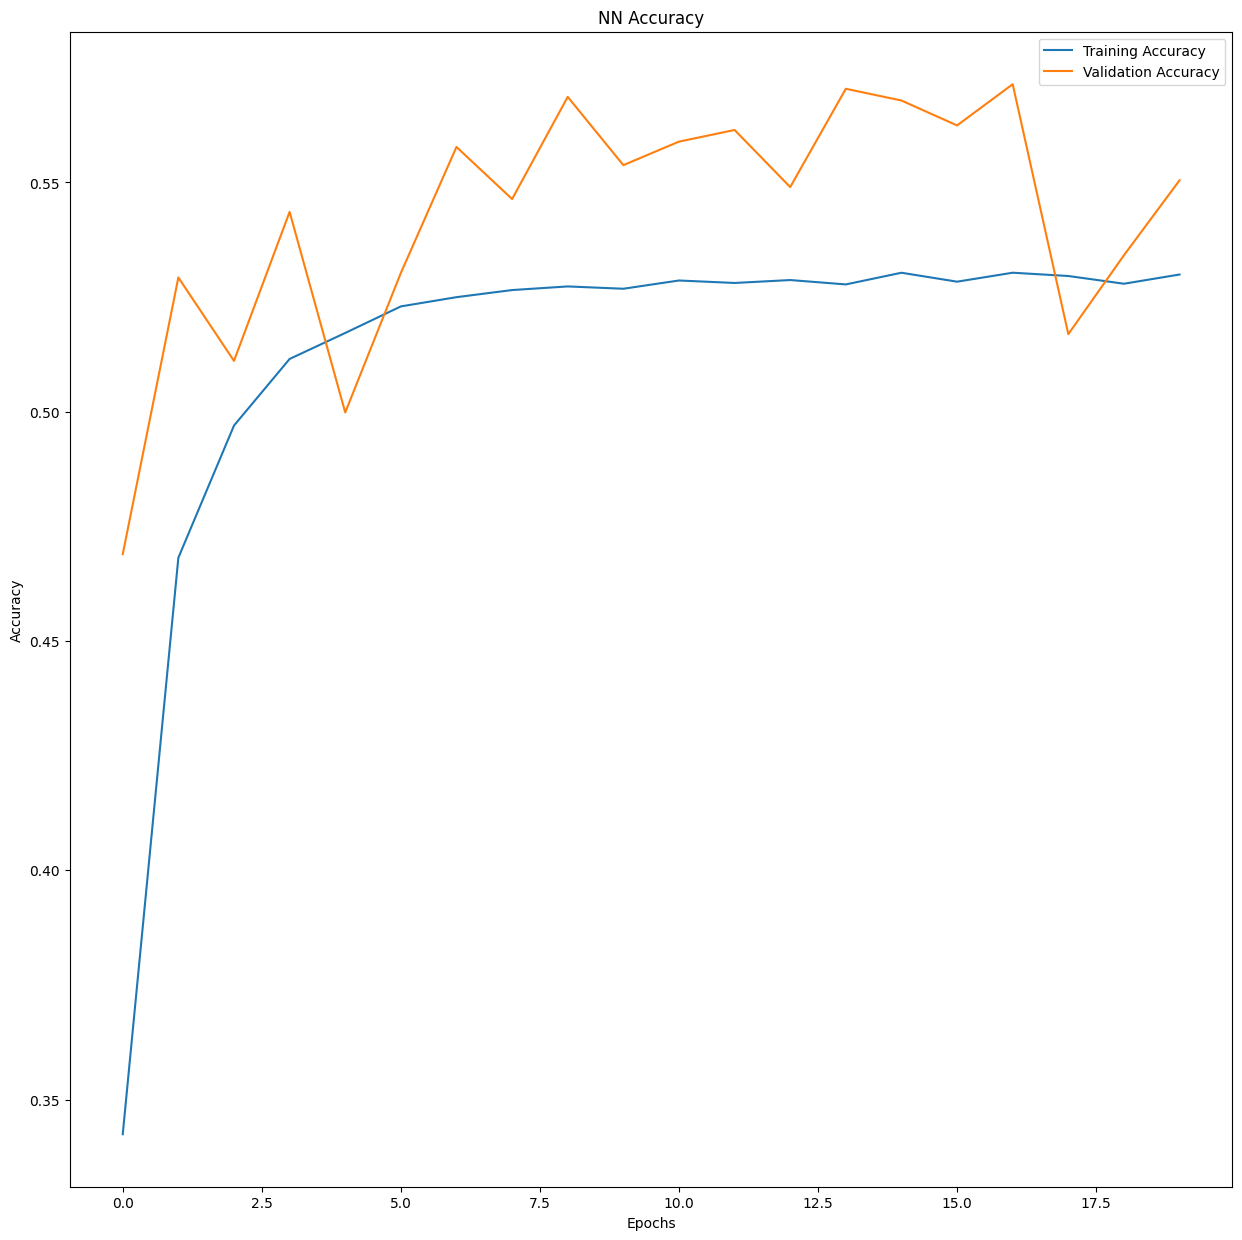

In [68]:
plt.plot(nn_history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(nn_history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy (if available)

# Labels and title
plt.title('NN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()  # Show legend

# Display plot
plt.show()


LSTM

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Reshape
from tensorflow.keras import regularizers

# Define a function to build the LSTM model
def create_lstm_model():
    model = Sequential()
    
    # Input dense layer
    model.add(Dense(84, input_dim=20, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(70, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))

    # Reshape to match LSTM input shape (batch_size, time_steps, features)
    model.add(Reshape((1, -1)))  # Reshape output to (batch_size, 1, 70)

    # Add LSTM layer
    model.add(LSTM(50))  # LSTM with 50 units

    # Fully connected layers
    model.add(Dense(56, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(42, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(28, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))

    # Output layer
    model.add(Dense(12, activation='softmax'))  # Use `n_classes` dynamically

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model


lstm_model = create_lstm_model()
print(lstm_model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 84)                  │           1,764 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 70)                  │           5,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 70)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          24,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 56)                  │           2,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 42)                  │           2,394 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 28)                  │           1,204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 12)                  │             348 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,716 (151.23 KB)

 Trainable params: 38,716 (151.23 KB)

 Non-trainable params: 0 (0.00 B)

None


In [70]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath="lstm_best_model.keras",  # Save the best model to this file
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode='min',  # Minimize validation loss
    verbose=1  # Print updates
)

# Train the model
lstm_history = lstm_model.fit(
    X_train, Y_train, 
    validation_data=(X_test, Y_test),  # Include validation data
    epochs=20,  # Adjust epochs as needed
    batch_size=256, 
    callbacks=[checkpoint]  # Use checkpoint callback
)


Epoch 1/20
723/726 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3845 - loss: 1.7025
Epoch 1: val_loss improved from inf to 1.38999, saving model to lstm_best_model.keras
726/726 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3847 - loss: 1.7015 - val_accuracy: 0.4406 - val_loss: 1.3900
Epoch 2/20
724/726 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4473 - loss: 1.3912
Epoch 2: val_loss improved from 1.38999 to 1.34696, saving model to lstm_best_model.keras
726/726 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4473 - loss: 1.3912 - val_accuracy: 0.4590 - val_loss: 1.3470
Epoch 3/20
722/726 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4654 - loss: 1.3567
Epoch 3: val_loss improved from 1.34696 to 1.28114, saving model to lstm_best_model.keras
726/726 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4654 - loss: 1.3566 - val_accuracy: 0.4698 - val_loss: 1.2811
Epoch 4/20
725/726 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4723 - loss: 1.3396
Epoch 4: val_loss improved from 1.2811

1451/1451 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
LSTM Accuracy: 51.30470382899869 %


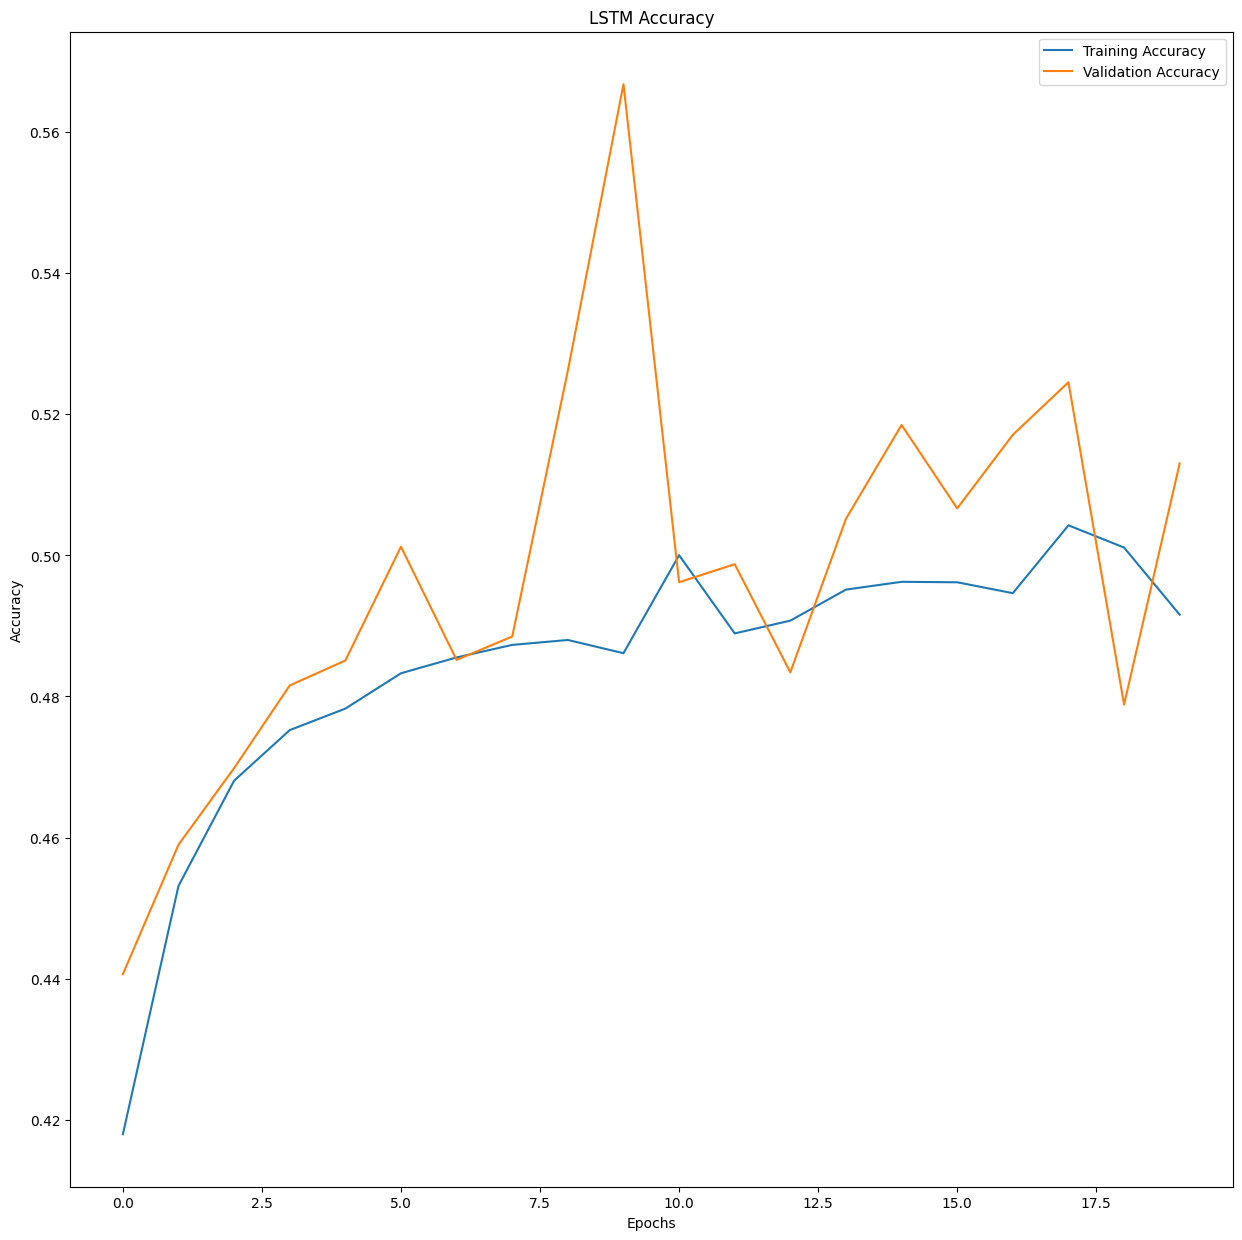

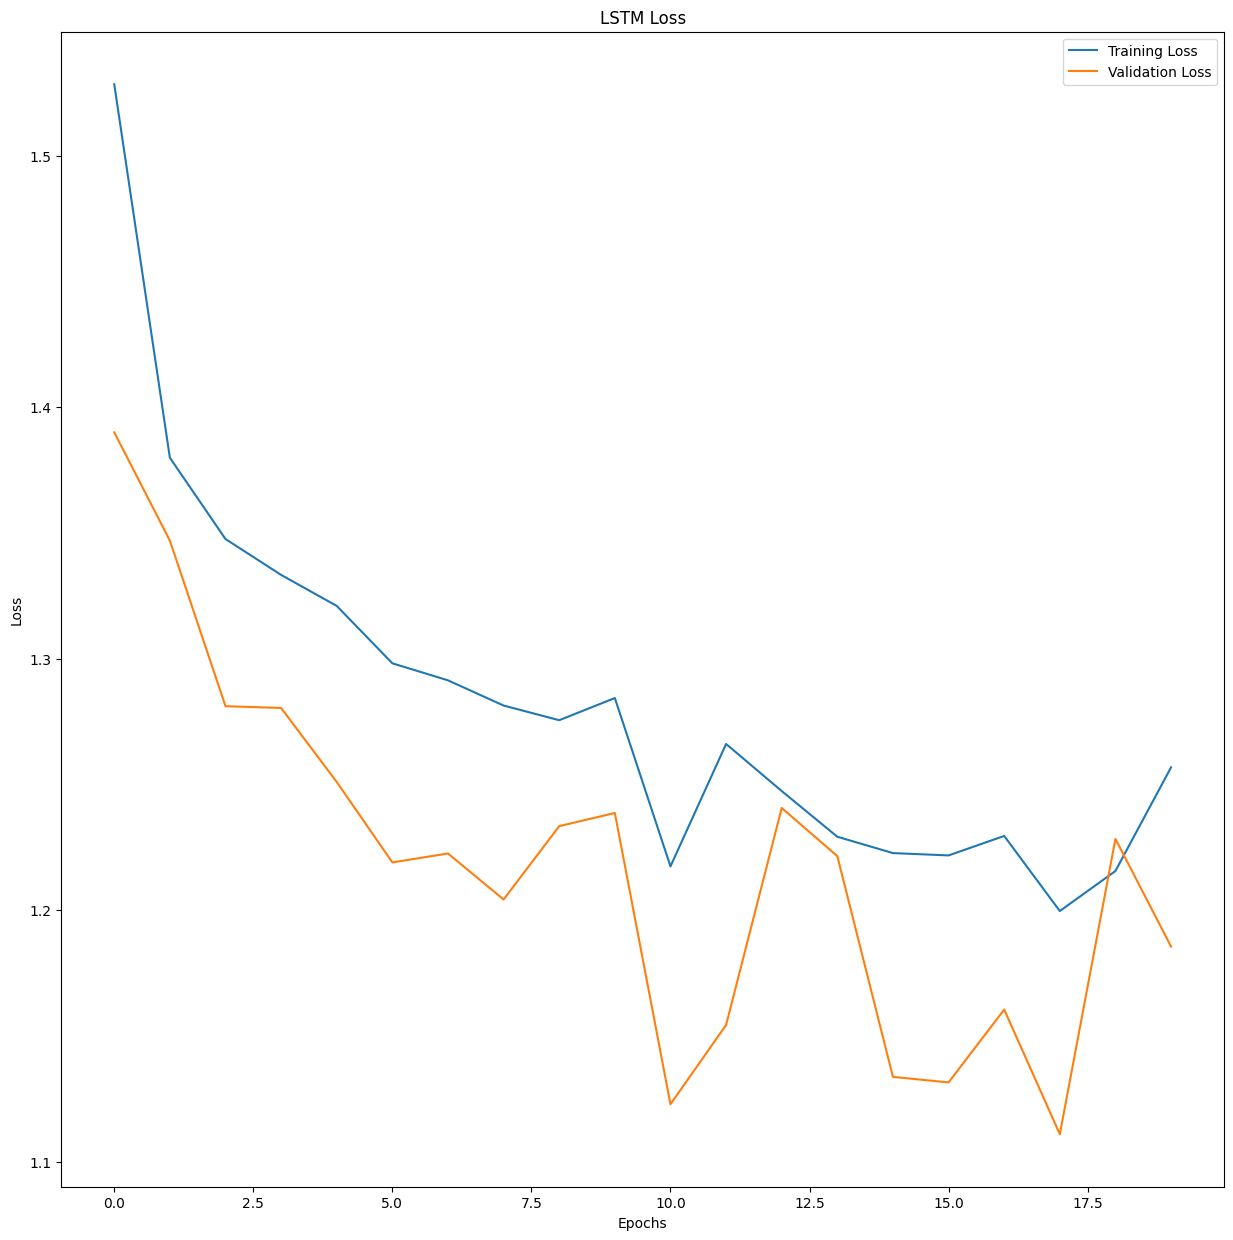

In [71]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities on the test data
y_pred = lstm_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert to class labels too. Otherwise, use y_test directly.
# For example, if y_test is one-hot encoded:
# y_true_labels = np.argmax(y_test, axis=1)
# But if y_test is already in multiclass format:
y_true_labels = y_test

# Calculate accuracy
score = accuracy_score(y_true_labels, y_pred_labels)
print('LSTM Accuracy:', score * 100, '%')

# Plot Accuracy
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [72]:
# Obtain predictions on the test data
y_pred = lstm_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_labels = np.argmax(Y_test, axis=1)  # Convert one-hot encoded Y_test to labels

print("\n\n********************************\n\n")
print_all_accuracy_metrics(y_true_labels,y_pred_labels,"LSTM Model")
print("**********************************\n\n")


1451/1451 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


********************************


LSTM Model: Accuracy: 0.513

LSTM Model: F1 Score: 0.215

LSTM Model: Recall: 0.222

LSTM Model: Precision: 0.263



Classification Report


              precision    recall  f1-score   support

           0       0.43      0.34      0.38     10055
           1       0.00      0.00      0.00       366
           2       0.34      0.82      0.48      9894
           3       0.00      0.00      0.00      2072
           4       0.52      0.20      0.29     10124
           5       0.00      0.00      0.00      1006
           6       0.00      0.00      0.00      1071
           7       0.93      0.31      0.46      1176
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         7
          10       0.94      1.00      0.97      9965
          11       0.00      0.00      0.00       671

    accuracy                           0.51     46409
   macro avg       0.

GRU

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, Reshape, Flatten
from tensorflow.keras import regularizers

def create_gru_model():
    model = Sequential()
    
    # Input layer
    model.add(Dense(84, input_dim=20, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(70, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25)) 
    
    model.add(Dense(56, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(42, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
              
    model.add(Dense(28, kernel_initializer='normal', 
                    kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    
    # Reshape layer to match GRU input requirements
    model.add(Reshape((1, 28)))  # Reshaped to 1 time step and 28 features

    # GRU layer
    model.add(GRU(32, activation='tanh', return_sequences=False))
    
    # Output layer
    model.add(Dense(15, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

# Create the GRU model
gru_model = create_gru_model()
print(gru_model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 84)                  │           1,764 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 70)                  │           5,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 56)                  │           3,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 42)                  │           2,394 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 28)                  │           1,204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 1, 28)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 32)                  │           5,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 15)                  │             495 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,735 (84.90 KB)

 Trainable params: 21,735 (84.90 KB)

 Non-trainable params: 0 (0.00 B)

None


In [74]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath="gru_best_model.keras",  # Save the best model to this file
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode='min',  # Minimize validation loss
    verbose=1  # Print updates
)

# Train the model (replace lstm_model, X_train, Y_train, etc. with actual variables)
lstm_history = lstm_model.fit(
    X_train, Y_train, 
    validation_data=(X_test, Y_test),  # Include validation data
    epochs=20,  # Adjust epochs as needed
    batch_size=256, 
    callbacks=[checkpoint]  # Use checkpoint callback
)


Epoch 1/20
719/726 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4987 - loss: 1.2279
Epoch 1: val_loss improved from inf to 1.15208, saving model to gru_best_model.keras
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4987 - loss: 1.2279 - val_accuracy: 0.5136 - val_loss: 1.1521
Epoch 2/20
715/726 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5045 - loss: 1.1977
Epoch 2: val_loss improved from 1.15208 to 1.09964, saving model to gru_best_model.keras
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5045 - loss: 1.1975 - val_accuracy: 0.5125 - val_loss: 1.0996
Epoch 3/20
724/726 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5120 - loss: 1.1823
Epoch 3: val_loss did not improve from 1.09964
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5120 - loss: 1.1823 - val_accuracy: 0.5002 - val_loss: 1.1697
Epoch 4/20
721/726 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5007 - loss: 1.2175
Epoch 4: val_loss improved from 1.09964 to 1.09656, saving model to gru_best_model.k

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Predict
y_pred = gru_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Ensure y_test is in the correct format
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # If one-hot encoded
    y_true_labels = np.argmax(y_test, axis=1)
else:  # If already in label format
    y_true_labels = y_test

# Calculate accuracy
score = accuracy_score(y_true_labels, y_pred_labels)
print(f'GRU Accuracy: {score * 100:.2f}%')

# Ensure training history exists
if 'gru_history' in locals():
    # Plot Accuracy
    plt.plot(gru_history.history['accuracy'], label='Training Accuracy')
    plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')

    plt.title('GRU Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot Loss
    plt.plot(gru_history.history['loss'], label='Training Loss')
    plt.plot(gru_history.history['val_loss'], label='Validation Loss')

    plt.title('GRU Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
else:
    print("gru_history is not defined. Ensure model.fit() has been executed.")


1451/1451 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
GRU Accuracy: 3.99%
gru_history is not defined. Ensure model.fit() has been executed.


In [76]:
# Obtain predictions on the test data
y_pred = gru_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_labels = np.argmax(Y_test, axis=1)  # Convert one-hot encoded Y_test to labels

print("\n\n********************************\n\n")
print_all_accuracy_metrics(y_true_labels,y_pred_labels,"GRU Model")
print("**********************************\n\n")


1451/1451 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


********************************


GRU Model: Accuracy: 0.040

GRU Model: F1 Score: 0.025

GRU Model: Recall: 0.057

GRU Model: Precision: 0.101



Classification Report


              precision    recall  f1-score   support

           0       0.90      0.01      0.01     10055
           1       0.25      0.01      0.02       366
           2       0.19      0.06      0.09      9894
           3       0.15      0.40      0.22      2072
           4       0.00      0.00      0.00     10124
           5       0.01      0.37      0.03      1006
           6       0.01      0.01      0.01      1071
           7       0.00      0.00      0.00      1176
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00      9965
          11       0.00      0.00      0.00       671
          12       0.00      0.00      0.00         0
          13       0.00   

Auto Encoders

Epoch 1/20
726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.0623 - loss: 193673698476032.0000 - val_binary_accuracy: 0.0608 - val_loss: 198427086422016.0000
Epoch 2/20
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.0613 - loss: 195397976850432.0000 - val_binary_accuracy: 0.0580 - val_loss: 198427086422016.0000
Epoch 3/20
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.0590 - loss: 195199653380096.0000 - val_binary_accuracy: 0.0581 - val_loss: 198427086422016.0000
Epoch 4/20
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.0586 - loss: 195271929626624.0000 - val_binary_accuracy: 0.0579 - val_loss: 198427086422016.0000
Epoch 5/20
726/726 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.0583 - loss: 196869540020224.0000 - val_binary_accuracy: 0.0562 - val_loss: 198427086422016.0000
Epoch 6/20
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.0570 - loss: 195245119635456.0000 - val_binary_accuracy: 0.0543 - val_loss: 1

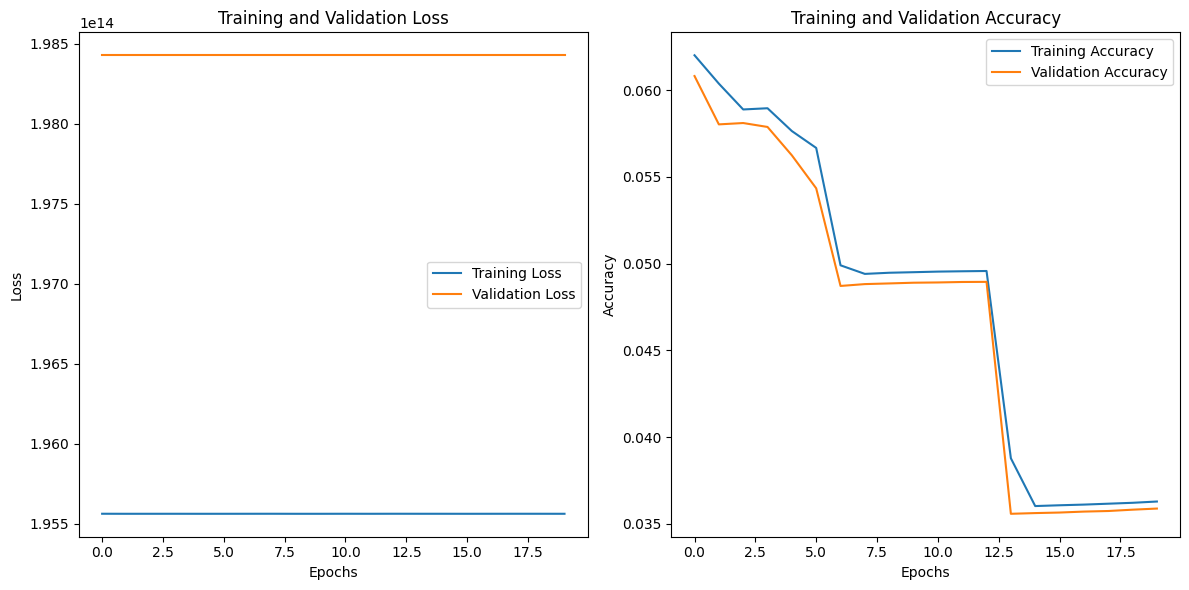

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Assuming X_train is your training data
input_dim = X_train.shape[1]

# Define the architecture of the autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model with mean squared error and binary accuracy
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['binary_accuracy'])  # Fixed typo

# Train the autoencoder (Use validation_data, not validation_split)
history = autoencoder.fit(X_train, X_train,  # Autoencoders train on input = output
                          epochs=20, 
                          batch_size=256, 
                          validation_data=(X_test, X_test))  # Fixed incorrect validation

# Save the model
autoencoder.save("autoencoder_model.h5")

# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
